# 1.-Análisis mercado de vivienda y alquiler en Madrid

Primero analizaremos a fondo el mercado de alquiler de inmuebles en el centro de Madrid, para poder a continuación estudiar las mejores opciones de compra actuales del mercado imobiliario de Madrid.

In [1]:
import pandas as pd

In [2]:

import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
viviendas= pd.read_csv('houses_Madrid.csv', index_col=0)
viviendas.to_csv('viviendas_tableau.csv')

In [4]:
viviendas.head(4)

,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False


In [5]:
viviendas.columns

Index(['id', 'title', 'subtitle', 'sq_mt_built', 'sq_mt_useful', 'n_rooms',
       'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude', 'longitude',
       'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',
       'is_parking_included_in_price', 'parking_price', 'is

In [6]:
viviendas.neighborhood_id.value_counts()

Neighborhood 23: Malasaña-Universidad (5196.25 €/m2) - District 4: Centro                485
Neighborhood 59: Conde Orgaz-Piovera (4275.46 €/m2) - District 9: Hortaleza              471
Neighborhood 28: El Viso (6255.45 €/m2) - District 5: Chamartín                          467
Neighborhood 32: Almagro (6564.27 €/m2) - District 6: Chamberí                           423
Neighborhood 72: Aravaca (3600.4 €/m2) - District 11: Moncloa                            419
                                                                                        ... 
Neighborhood 80: Horcajo (None €/m2) - District 12: Moratalaz                             11
Neighborhood 9: Campo de las Naciones-Corralejos (3417.44 €/m2) - District 2: Barajas      9
Neighborhood 10: Casco Histórico de Barajas (3100.87 €/m2) - District 2: Barajas           6
Neighborhood 11: Timón (2879.88 €/m2) - District 2: Barajas                                6
Neighborhood 65: Cuatro Vientos (None €/m2) - District 10: Latina     

In [7]:
viviendas.latitude.isnull().sum()

21742

In [8]:
viviendas.neighborhood_id.isnull().sum()

0

In [9]:
viviendas.shape

(21742, 57)

# 2.-Limpieza Dataset

In [10]:
viviendas.rent_price.isnull().sum()

0

In [11]:
viviendas.buy_price.isnull().sum()

0

In [12]:
viviendas.groupby('neighborhood_id').rent_price.mean()
viviendas.groupby('neighborhood_id').buy_price.mean()

neighborhood_id
Neighborhood 100: Guindalera (4367.9 €/m2) - District 15: Salamanca                      5.264723e+05
Neighborhood 101: Lista (5681.21 €/m2) - District 15: Salamanca                          8.270024e+05
Neighborhood 102: Recoletos (8392.43 €/m2) - District 15: Salamanca                      2.256653e+06
Neighborhood 10: Casco Histórico de Barajas (3100.87 €/m2) - District 2: Barajas         2.240667e+05
Neighborhood 111: Bellas Vistas (3536.07 €/m2) - District 17: Tetuán                     2.640225e+05
                                                                                             ...     
Neighborhood 96: Niño Jesús (4935.6 €/m2) - District 14: Retiro                          8.608606e+05
Neighborhood 97: Castellana (6882.35 €/m2) - District 15: Salamanca                      1.691577e+06
Neighborhood 98: Fuente del Berro (4452.82 €/m2) - District 15: Salamanca                4.882393e+05
Neighborhood 99: Goya (5887.64 €/m2) - District 15: Salamanca     

In [13]:
viviendas['barrio']=viviendas['neighborhood_id'].replace({'Neighborhood 135: San Cristóbal (1308.89 €/m2) - District 21: Villaverde':'Villaverde',
       'Neighborhood 132: Los Ángeles (1796.68 €/m2) - District 21: Villaverde':'Villaverde',
       'Neighborhood 134: San Andrés (1617.18 €/m2) - District 21: Villaverde':'Villaverde',
       'Neighborhood 133: Los Rosales (1827.79 €/m2) - District 21: Villaverde':'Villaverde',
       'Neighborhood 131: Butarque (2197.8 €/m2) - District 21: Villaverde':'Villaverde',
       'Neighborhood 127: Valdebernardo - Valderribas (2750.0 €/m2) - District 19: Vicálvaro':'Vicalvaro',
       'Neighborhood 124: Ambroz (2094.51 €/m2) - District 19: Vicálvaro':'Vicalvaro',
       'Neighborhood 125: Casco Histórico de Vicálvaro (2064.65 €/m2) - District 19: Vicálvaro':'Vicalvaro',
       'Neighborhood 126: El Cañaveral - Los Berrocales (2271.52 €/m2) - District 19: Vicálvaro':'Vicalvaro',
       'Neighborhood 128: Casco Histórico de Vallecas (1956.0 €/m2) - District 20: Villa de Vallecas':'Villa de Vallecas',
       'Neighborhood 129: Ensanche de Vallecas - La Gavia (2677.28 €/m2) - District 20: Villa de Vallecas':'Villa de Vallecas',
       'Neighborhood 130: Santa Eugenia (2175.93 €/m2) - District 20: Villa de Vallecas':'Villa de Vallecas',
       'Neighborhood 119: Orcasitas (1931.95 €/m2) - District 18: Usera':'Usera',
       'Neighborhood 121: San Fermín (1912.8 €/m2) - District 18: Usera':'Usera',
       'Neighborhood 118: Moscardó (2284.48 €/m2) - District 18: Usera':'Usera',
       'Neighborhood 120: Pradolongo (2068.64 €/m2) - District 18: Usera':'Usera',
       'Neighborhood 122: Zofío (1941.38 €/m2) - District 18: Usera':'Usera',
       'Neighborhood 117: Almendrales (2205.31 €/m2) - District 18: Usera':'Usera',
       'Neighborhood 123: 12 de Octubre-Orcasur (1637.13 €/m2) - District 18: Usera':'Usera',
       'Neighborhood 115: Valdeacederas (3163.8 €/m2) - District 17: Tetuán':'Tetuan',
       'Neighborhood 114: Cuzco-Castillejos (4347.59 €/m2) - District 17: Tetuán':'Tetuan',
       'Neighborhood 113: Cuatro Caminos (4247.49 €/m2) - District 17: Tetuán':'Tetuan',
       'Neighborhood 111: Bellas Vistas (3536.07 €/m2) - District 17: Tetuán':'Tetuan',
       'Neighborhood 112: Berruguete (3273.56 €/m2) - District 17: Tetuán':'Tetuan',
       'Neighborhood 116: Ventilla-Almenara (3314.54 €/m2) - District 17: Tetuán':'Tetuan',
       'Neighborhood 96: Niño Jesús (4935.6 €/m2) - District 14: Retiro':'Retiro',
       'Neighborhood 93: Ibiza (5492.17 €/m2) - District 14: Retiro':'Retiro',
       'Neighborhood 91: Adelfas (4020.62 €/m2) - District 14: Retiro':'Retiro',
       'Neighborhood 95: Pacífico (4105.12 €/m2) - District 14: Retiro':'Retiro',
       'Neighborhood 94: Jerónimos (6739.32 €/m2) - District 14: Retiro':'Retiro',
       'Neighborhood 92: Estrella (4246.58 €/m2) - District 14: Retiro':'Retiro',
       'Neighborhood 87: Palomeras sureste (2076.58 €/m2) - District 13: Puente de Vallecas':'Puente de Vallecas',
       'Neighborhood 86: Palomeras Bajas (1983.7 €/m2) - District 13: Puente de Vallecas':'Puente de Vallecas',
       'Neighborhood 89: San Diego (2007.79 €/m2) - District 13: Puente de Vallecas':'Puente de Vallecas',
       'Neighborhood 85: Entrevías (1574.36 €/m2) - District 13: Puente de Vallecas':'Puente de Vallecas',
       'Neighborhood 90: Numancia (2081.94 €/m2) - District 13: Puente de Vallecas':'Puente de Vallecas',
       'Neighborhood 88: Portazgo (1896.75 €/m2) - District 13: Puente de Vallecas':'Puente de Vallecas',
       'Neighborhood 72: Aravaca (3600.4 €/m2) - District 11: Moncloa':'Moncloa',
       'Neighborhood 73: Argüelles (4807.69 €/m2) - District 11: Moncloa':'Moncloa',
       'Neighborhood 75: Ciudad Universitaria (3810.08 €/m2) - District 11: Moncloa':'Moncloa',
       'Neighborhood 77: Valdezarza (2951.77 €/m2) - District 11: Moncloa':'Moncloa',
       'Neighborhood 74: Casa de Campo (3630.68 €/m2) - District 11: Moncloa':'Moncloa',
       'Neighborhood 78: Valdemarín (4249.04 €/m2) - District 11: Moncloa':'Moncloa',
       'Neighborhood 76: El Plantío (2569.96 €/m2) - District 11: Moncloa':'Moncloa',
       'Neighborhood 81: Fontarrón (2319.44 €/m2) - District 12: Moratalaz':'Moratalaz',
       'Neighborhood 84: Vinateros (2538.1 €/m2) - District 12: Moratalaz':'Moratalaz',
       'Neighborhood 82: Marroquina (2928.57 €/m2) - District 12: Moratalaz':'Moratalaz',
       'Neighborhood 83: Media Legua (2803.11 €/m2) - District 12: Moratalaz':'Moratalaz',
       'Neighborhood 80: Horcajo (None €/m2) - District 12: Moratalaz':'Moratalaz',
       'Neighborhood 79: Pavones (None €/m2) - District 12: Moratalaz':'Moratalaz',
       'Neighborhood 70: Puerta del Ángel (2443.62 €/m2) - District 10: Latina':'Latina',
       'Neighborhood 67: Aluche (2190.48 €/m2) - District 10: Latina':'Latina',
       'Neighborhood 69: Lucero (2363.25 €/m2) - District 10: Latina':'Latina',
       'Neighborhood 71: Los Cármenes (2458.61 €/m2) - District 10: Latina':'Latina',
       'Neighborhood 66: Águilas (2110.34 €/m2) - District 10: Latina':'Latina',
       'Neighborhood 68: Campamento (2275.63 €/m2) - District 10: Latina':'Latina',
       'Neighborhood 65: Cuatro Vientos (None €/m2) - District 10: Latina':'Latina',
       'Neighborhood 51: Las Tablas (4256.38 €/m2) - District 8: Fuencarral':'Fuencarral',
       'Neighborhood 56: Mirasierra (3695.5 €/m2) - District 8: Fuencarral':'Fuencarral',
       'Neighborhood 52: Montecarmelo (4610.95 €/m2) - District 8: Fuencarral':'Fuencarral',
       'Neighborhood 50: La Paz (3500.0 €/m2) - District 8: Fuencarral':'Fuencarral',
       'Neighborhood 53: Peñagrande (3271.96 €/m2) - District 8: Fuencarral':'Fuencarral',
       'Neighborhood 54: Pilar (3222.22 €/m2) - District 8: Fuencarral':'Fuencarral',
       'Neighborhood 49: Fuentelarreina (3371.55 €/m2) - District 8: Fuencarral':'Fuencarral',
       'Neighborhood 55: Tres Olivos - Valverde (2648.73 €/m2) - District 8: Fuencarral':'Fuencarral',
       'Neighborhood 48: Arroyo del Fresno (3718.4 €/m2) - District 8: Fuencarral':'Fuencarral',
       'Neighborhood 47: El Pardo (None €/m2) - District 8: Fuencarral':'Fuencarral',
       'Neighborhood 62: Sanchinarro (4456.18 €/m2) - District 9: Hortaleza':'Hortaleza',
       'Neighborhood 59: Conde Orgaz-Piovera (4275.46 €/m2) - District 9: Hortaleza':'Hortaleza',
       'Neighborhood 63: Valdebebas - Valdefuentes (3607.13 €/m2) - District 9: Hortaleza':'Hortaleza',
       'Neighborhood 58: Canillas (3152.53 €/m2) - District 9: Hortaleza':'Hortaleza',
       'Neighborhood 60: Palomas (3773.82 €/m2) - District 9: Hortaleza':'Hortaleza',
       'Neighborhood 64: Virgen del Cortijo - Manoteras (3636.96 €/m2) - District 9: Hortaleza':'Hortaleza',
       'Neighborhood 61: Pinar del Rey (2915.33 €/m2) - District 9: Hortaleza':'Hortaleza',
       'Neighborhood 57: Apóstol Santiago (2679.63 €/m2) - District 9: Hortaleza':'Hortaleza',
       'Neighborhood 34: Gaztambide (5000.0 €/m2) - District 6: Chamberí':'Chamberi',
       'Neighborhood 37: Nuevos Ministerios-Ríos Rosas (5000.0 €/m2) - District 6: Chamberí':'Chamberi',
       'Neighborhood 32: Almagro (6564.27 €/m2) - District 6: Chamberí':'Chamberi',
       'Neighborhood 35: Trafalgar (5640.18 €/m2) - District 6: Chamberí':'Chamberi',
       'Neighborhood 33: Arapiles (4869.57 €/m2) - District 6: Chamberí':'Chamberi',
       'Neighborhood 36: Vallehermoso (4548.3 €/m2) - District 6: Chamberí':'Chamberi',
       'Neighborhood 42: Ventas (2686.93 €/m2) - District 7: Ciudad Lineal':'Ciudad Lineal',
       'Neighborhood 39: Pueblo Nuevo (2578.87 €/m2) - District 7: Ciudad Lineal':'Ciudad Lineal',
       'Neighborhood 43: Atalaya (None €/m2) - District 7: Ciudad Lineal':'Ciudad Lineal',
       'Neighborhood 40: Quintana (2900.58 €/m2) - District 7: Ciudad Lineal':'Ciudad Lineal',
       'Neighborhood 46: San Juan Bautista (4098.7 €/m2) - District 7: Ciudad Lineal':'Ciudad Lineal',
       'Neighborhood 44: Colina (4677.53 €/m2) - District 7: Ciudad Lineal':'Ciudad Lineal',
       'Neighborhood 45: Costillares (4235.69 €/m2) - District 7: Ciudad Lineal':'Ciudad Lineal',
       'Neighborhood 38: Concepción (3341.09 €/m2) - District 7: Ciudad Lineal':'Ciudad Lineal',
       'Neighborhood 41: San Pascual (4015.76 €/m2) - District 7: Ciudad Lineal':'Ciudad Lineal',
       'Neighborhood 28: El Viso (6255.45 €/m2) - District 5: Chamartín':'Chamartin',
       'Neighborhood 29: Nueva España (5363.75 €/m2) - District 5: Chamartín':'Chamartin',
       'Neighborhood 26: Castilla (4354.35 €/m2) - District 5: Chamartín':'Chamartin',
       'Neighborhood 31: Bernabéu-Hispanoamérica (5170.22 €/m2) - District 5: Chamartín':'Chamartin',
       'Neighborhood 30: Prosperidad (4255.84 €/m2) - District 5: Chamartín':'Chamartin',
       'Neighborhood 27: Ciudad Jardín (4572.45 €/m2) - District 5: Chamartín':'Chamartin',
       'Neighborhood 22: Lavapiés-Embajadores (4448.3 €/m2) - District 4: Centro':'Centro',
       'Neighborhood 15: Opañel (2235.32 €/m2) - District 3: Carabanchel':'Carabanchel',
       'Neighborhood 14: Comillas (2527.59 €/m2) - District 3: Carabanchel':'Carabanchel',
       'Neighborhood 12: Abrantes (1964.55 €/m2) - District 3: Carabanchel':'Carabanchel',
       'Neighborhood 19: San Isidro (2323.93 €/m2) - District 3: Carabanchel':'Carabanchel',
       'Neighborhood 17: Puerta Bonita (1980.04 €/m2) - District 3: Carabanchel':'Carabanchel',
       'Neighborhood 18: Vista Alegre (2048.47 €/m2) - District 3: Carabanchel':'Carabanchel',
       'Neighborhood 16: Pau de Carabanchel (3120.54 €/m2) - District 3: Carabanchel':'Carabanchel',
       'Neighborhood 13: Buena Vista (1886.6 €/m2) - District 3: Carabanchel':'Carabanchel',
       'Neighborhood 21: Huertas-Cortes (5000.0 €/m2) - District 4: Centro':'Centro',
       'Neighborhood 23: Malasaña-Universidad (5196.25 €/m2) - District 4: Centro':'Centro',
       'Neighborhood 20: Chueca-Justicia (6029.36 €/m2) - District 4: Centro':'Centro',
       'Neighborhood 24: Palacio (4693.52 €/m2) - District 4: Centro':'Centro',
       'Neighborhood 25: Sol (5390.99 €/m2) - District 4: Centro':'Centro',
       'Neighborhood 102: Recoletos (8392.43 €/m2) - District 15: Salamanca':'Salamanca',
       'Neighborhood 99: Goya (5887.64 €/m2) - District 15: Salamanca':'Salamanca',
       'Neighborhood 101: Lista (5681.21 €/m2) - District 15: Salamanca':'Salamanca',
       'Neighborhood 97: Castellana (6882.35 €/m2) - District 15: Salamanca':'Salamanca',
       'Neighborhood 100: Guindalera (4367.9 €/m2) - District 15: Salamanca':'Salamanca',
       'Neighborhood 98: Fuente del Berro (4452.82 €/m2) - District 15: Salamanca':'Salamanca',
       'Neighborhood 3: Imperial (4098.59 €/m2) - District 1: Arganzuela':'Arganzuela',
       'Neighborhood 1: Chopera (3783.78 €/m2) - District 1: Arganzuela':'Arganzuela',
       'Neighborhood 5: Acacias (4208.0 €/m2) - District 1: Arganzuela':'Arganzuela',
       'Neighborhood 2: Delicias (3972.6 €/m2) - District 1: Arganzuela':'Arganzuela',
       'Neighborhood 6: Palos de Moguer (3975.0 €/m2) - District 1: Arganzuela':'Arganzuela',
       'Neighborhood 4: Legazpi (4486.93 €/m2) - District 1: Arganzuela':'Arganzuela',
       'Neighborhood 10: Casco Histórico de Barajas (3100.87 €/m2) - District 2: Barajas':'Barajas',
       'Neighborhood 8: Alameda de Osuna (3113.42 €/m2) - District 2: Barajas':'Barajas',
       'Neighborhood 11: Timón (2879.88 €/m2) - District 2: Barajas':'Barajas',
       'Neighborhood 9: Campo de las Naciones-Corralejos (3417.44 €/m2) - District 2: Barajas':'Barajas'})

In [14]:
viviendas['barrio']

0        Villaverde
1        Villaverde
2        Villaverde
3        Villaverde
4        Villaverde
            ...    
21737       Barajas
21738       Barajas
21739       Barajas
21740       Barajas
21741    Arganzuela
Name: barrio, Length: 21742, dtype: object

Vamos a limpiar el dataset.


In [15]:
viviendas2= viviendas

In [16]:
viviendas.neighborhood_id.unique()

array(['Neighborhood 135: San Cristóbal (1308.89 €/m2) - District 21: Villaverde',
       'Neighborhood 132: Los Ángeles (1796.68 €/m2) - District 21: Villaverde',
       'Neighborhood 134: San Andrés (1617.18 €/m2) - District 21: Villaverde',
       'Neighborhood 133: Los Rosales (1827.79 €/m2) - District 21: Villaverde',
       'Neighborhood 131: Butarque (2197.8 €/m2) - District 21: Villaverde',
       'Neighborhood 127: Valdebernardo - Valderribas (2750.0 €/m2) - District 19: Vicálvaro',
       'Neighborhood 124: Ambroz (2094.51 €/m2) - District 19: Vicálvaro',
       'Neighborhood 125: Casco Histórico de Vicálvaro (2064.65 €/m2) - District 19: Vicálvaro',
       'Neighborhood 126: El Cañaveral - Los Berrocales (2271.52 €/m2) - District 19: Vicálvaro',
       'Neighborhood 128: Casco Histórico de Vallecas (1956.0 €/m2) - District 20: Villa de Vallecas',
       'Neighborhood 129: Ensanche de Vallecas - La Gavia (2677.28 €/m2) - District 20: Villa de Vallecas',
       'Neighborhood 1

In [17]:
viviendas2.shape

(21742, 58)

Solo interior M-40. Vamos a dejar fuera del analisis las zonas de Barajas, Hortaleza, Fuencarral, San Blas, Vicálvaro, Villa de Vallecas y Villaverde. Estudiando así el mercado en el interior de la M-40.

In [18]:
viviendas2= viviendas2.loc[viviendas2.neighborhood_id.isin(['Neighborhood 119: Orcasitas (1931.95 €/m2) - District 18: Usera',
       'Neighborhood 121: San Fermín (1912.8 €/m2) - District 18: Usera',
       'Neighborhood 118: Moscardó (2284.48 €/m2) - District 18: Usera',
       'Neighborhood 120: Pradolongo (2068.64 €/m2) - District 18: Usera',
       'Neighborhood 122: Zofío (1941.38 €/m2) - District 18: Usera',
       'Neighborhood 117: Almendrales (2205.31 €/m2) - District 18: Usera',
       'Neighborhood 123: 12 de Octubre-Orcasur (1637.13 €/m2) - District 18: Usera',
       'Neighborhood 115: Valdeacederas (3163.8 €/m2) - District 17: Tetuán',
       'Neighborhood 114: Cuzco-Castillejos (4347.59 €/m2) - District 17: Tetuán',
       'Neighborhood 113: Cuatro Caminos (4247.49 €/m2) - District 17: Tetuán',
       'Neighborhood 111: Bellas Vistas (3536.07 €/m2) - District 17: Tetuán',
       'Neighborhood 112: Berruguete (3273.56 €/m2) - District 17: Tetuán',
       'Neighborhood 116: Ventilla-Almenara (3314.54 €/m2) - District 17: Tetuán',
       'Neighborhood 96: Niño Jesús (4935.6 €/m2) - District 14: Retiro',
       'Neighborhood 93: Ibiza (5492.17 €/m2) - District 14: Retiro',
       'Neighborhood 91: Adelfas (4020.62 €/m2) - District 14: Retiro',
       'Neighborhood 95: Pacífico (4105.12 €/m2) - District 14: Retiro',
       'Neighborhood 94: Jerónimos (6739.32 €/m2) - District 14: Retiro',
       'Neighborhood 92: Estrella (4246.58 €/m2) - District 14: Retiro',
       'Neighborhood 87: Palomeras sureste (2076.58 €/m2) - District 13: Puente de Vallecas',
       'Neighborhood 86: Palomeras Bajas (1983.7 €/m2) - District 13: Puente de Vallecas',
       'Neighborhood 89: San Diego (2007.79 €/m2) - District 13: Puente de Vallecas',
       'Neighborhood 85: Entrevías (1574.36 €/m2) - District 13: Puente de Vallecas',
       'Neighborhood 90: Numancia (2081.94 €/m2) - District 13: Puente de Vallecas',
       'Neighborhood 88: Portazgo (1896.75 €/m2) - District 13: Puente de Vallecas',
       'Neighborhood 72: Aravaca (3600.4 €/m2) - District 11: Moncloa',
       'Neighborhood 73: Argüelles (4807.69 €/m2) - District 11: Moncloa',
       'Neighborhood 75: Ciudad Universitaria (3810.08 €/m2) - District 11: Moncloa',
       'Neighborhood 77: Valdezarza (2951.77 €/m2) - District 11: Moncloa',
       'Neighborhood 74: Casa de Campo (3630.68 €/m2) - District 11: Moncloa',
       'Neighborhood 78: Valdemarín (4249.04 €/m2) - District 11: Moncloa',
       'Neighborhood 76: El Plantío (2569.96 €/m2) - District 11: Moncloa',
       'Neighborhood 81: Fontarrón (2319.44 €/m2) - District 12: Moratalaz',
       'Neighborhood 84: Vinateros (2538.1 €/m2) - District 12: Moratalaz',
       'Neighborhood 82: Marroquina (2928.57 €/m2) - District 12: Moratalaz',
       'Neighborhood 83: Media Legua (2803.11 €/m2) - District 12: Moratalaz',
       'Neighborhood 80: Horcajo (None €/m2) - District 12: Moratalaz',
       'Neighborhood 79: Pavones (None €/m2) - District 12: Moratalaz',
       'Neighborhood 70: Puerta del Ángel (2443.62 €/m2) - District 10: Latina',
       'Neighborhood 67: Aluche (2190.48 €/m2) - District 10: Latina',
       'Neighborhood 69: Lucero (2363.25 €/m2) - District 10: Latina',
       'Neighborhood 71: Los Cármenes (2458.61 €/m2) - District 10: Latina',
       'Neighborhood 66: Águilas (2110.34 €/m2) - District 10: Latina',
       'Neighborhood 68: Campamento (2275.63 €/m2) - District 10: Latina',
       'Neighborhood 65: Cuatro Vientos (None €/m2) - District 10: Latina',
       
       'Neighborhood 34: Gaztambide (5000.0 €/m2) - District 6: Chamberí',
       'Neighborhood 37: Nuevos Ministerios-Ríos Rosas (5000.0 €/m2) - District 6: Chamberí',
       'Neighborhood 32: Almagro (6564.27 €/m2) - District 6: Chamberí',
       'Neighborhood 35: Trafalgar (5640.18 €/m2) - District 6: Chamberí',
       'Neighborhood 33: Arapiles (4869.57 €/m2) - District 6: Chamberí',
       'Neighborhood 36: Vallehermoso (4548.3 €/m2) - District 6: Chamberí',
       'Neighborhood 42: Ventas (2686.93 €/m2) - District 7: Ciudad Lineal',
       'Neighborhood 39: Pueblo Nuevo (2578.87 €/m2) - District 7: Ciudad Lineal',
       'Neighborhood 43: Atalaya (None €/m2) - District 7: Ciudad Lineal',
       'Neighborhood 40: Quintana (2900.58 €/m2) - District 7: Ciudad Lineal',
       'Neighborhood 46: San Juan Bautista (4098.7 €/m2) - District 7: Ciudad Lineal',
       'Neighborhood 44: Colina (4677.53 €/m2) - District 7: Ciudad Lineal',
       'Neighborhood 45: Costillares (4235.69 €/m2) - District 7: Ciudad Lineal',
       'Neighborhood 38: Concepción (3341.09 €/m2) - District 7: Ciudad Lineal',
       'Neighborhood 41: San Pascual (4015.76 €/m2) - District 7: Ciudad Lineal',
       'Neighborhood 28: El Viso (6255.45 €/m2) - District 5: Chamartín',
       'Neighborhood 29: Nueva España (5363.75 €/m2) - District 5: Chamartín',
       'Neighborhood 26: Castilla (4354.35 €/m2) - District 5: Chamartín',
       'Neighborhood 31: Bernabéu-Hispanoamérica (5170.22 €/m2) - District 5: Chamartín',
       'Neighborhood 30: Prosperidad (4255.84 €/m2) - District 5: Chamartín',
       'Neighborhood 27: Ciudad Jardín (4572.45 €/m2) - District 5: Chamartín',
       'Neighborhood 22: Lavapiés-Embajadores (4448.3 €/m2) - District 4: Centro',
       'Neighborhood 15: Opañel (2235.32 €/m2) - District 3: Carabanchel',
       'Neighborhood 14: Comillas (2527.59 €/m2) - District 3: Carabanchel',
       'Neighborhood 12: Abrantes (1964.55 €/m2) - District 3: Carabanchel',
       'Neighborhood 19: San Isidro (2323.93 €/m2) - District 3: Carabanchel',
       'Neighborhood 17: Puerta Bonita (1980.04 €/m2) - District 3: Carabanchel',
       'Neighborhood 18: Vista Alegre (2048.47 €/m2) - District 3: Carabanchel',
       'Neighborhood 16: Pau de Carabanchel (3120.54 €/m2) - District 3: Carabanchel',
       'Neighborhood 13: Buena Vista (1886.6 €/m2) - District 3: Carabanchel',
       'Neighborhood 21: Huertas-Cortes (5000.0 €/m2) - District 4: Centro',
       'Neighborhood 23: Malasaña-Universidad (5196.25 €/m2) - District 4: Centro',
       'Neighborhood 20: Chueca-Justicia (6029.36 €/m2) - District 4: Centro',
       'Neighborhood 24: Palacio (4693.52 €/m2) - District 4: Centro',
       'Neighborhood 25: Sol (5390.99 €/m2) - District 4: Centro',
       'Neighborhood 102: Recoletos (8392.43 €/m2) - District 15: Salamanca',
       'Neighborhood 99: Goya (5887.64 €/m2) - District 15: Salamanca',
       'Neighborhood 101: Lista (5681.21 €/m2) - District 15: Salamanca',
       'Neighborhood 97: Castellana (6882.35 €/m2) - District 15: Salamanca',
       'Neighborhood 100: Guindalera (4367.9 €/m2) - District 15: Salamanca',
       'Neighborhood 98: Fuente del Berro (4452.82 €/m2) - District 15: Salamanca',
       'Neighborhood 3: Imperial (4098.59 €/m2) - District 1: Arganzuela',
       'Neighborhood 1: Chopera (3783.78 €/m2) - District 1: Arganzuela',
       'Neighborhood 5: Acacias (4208.0 €/m2) - District 1: Arganzuela',
       'Neighborhood 2: Delicias (3972.6 €/m2) - District 1: Arganzuela',
       'Neighborhood 6: Palos de Moguer (3975.0 €/m2) - District 1: Arganzuela',
       'Neighborhood 4: Legazpi (4486.93 €/m2) - District 1: Arganzuela'
])]

In [19]:
viviendas2.shape


(17061, 58)

In [20]:
viviendas2.columns

Index(['id', 'title', 'subtitle', 'sq_mt_built', 'sq_mt_useful', 'n_rooms',
       'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude', 'longitude',
       'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',
       'is_parking_included_in_price', 'parking_price', 'is

In [21]:
#Limpiamos características que no nos interesan.

viviendas2= viviendas2.drop(['sq_mt_useful', 'n_floors', 'sq_mt_allotment', 'latitude', 'longitude',
       'raw_address', 'street_name', 'street_number', 'portal','door','rent_price_by_area','are_pets_allowed','has_garden',
       'has_pool','has_balcony','is_furnished', 'is_kitchen_equipped','is_accessible','has_private_parking', 'has_public_parking',
       'is_parking_included_in_price', 'parking_price','operation'], axis=1)

In [22]:
viviendas2.shape

(17061, 35)

Solo Pisos y Áticos. Limpiamos el dataset para quedarnos con los Pisos y Áticos, dada la diferencia que existe en cuanto al estudio de la influencia de las caracteristicas de la vivienda en el precio, entre este tipo de viviendas y los Chalet, que además en las zonas estudiadas de Madrid representan una minoría.

In [23]:
viviendas2.house_type_id.unique()

array(['HouseType 1: Pisos', 'HouseType 2: Casa o chalet',
       'HouseType 5: Áticos', 'HouseType 4: Dúplex', nan], dtype=object)

In [24]:
viviendas2= viviendas2.loc[viviendas2.house_type_id.isin(['HouseType 1: Pisos','HouseType 5: Áticos'])]

In [25]:
viviendas2.shape

(15161, 35)

# 3.-Análisis de las características de las viviendas como variables sobre el precio de alquiler

La variable objetivo es rent_price . Queremos calcular no las caracteristicas que influyen en el precio de venta de una vivienda sino, las caracteristicas de estas casas que mas van han influir sobre el precio de estas viviendas una vez sacadas al mercado de alquiler.

In [26]:
viviendas2.columns

Index(['id', 'title', 'subtitle', 'sq_mt_built', 'n_rooms', 'n_bathrooms',
       'is_exact_address_hidden', 'floor', 'is_floor_under', 'neighborhood_id',
       'rent_price', 'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'has_terrace', 'has_storage_room', 'has_green_zones',
       'energy_certificate', 'has_parking', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east',
       'barrio'],
      dtype='object')

In [27]:
viviendas2.neighborhood_id.unique()

array(['Neighborhood 119: Orcasitas (1931.95 €/m2) - District 18: Usera',
       'Neighborhood 121: San Fermín (1912.8 €/m2) - District 18: Usera',
       'Neighborhood 118: Moscardó (2284.48 €/m2) - District 18: Usera',
       'Neighborhood 120: Pradolongo (2068.64 €/m2) - District 18: Usera',
       'Neighborhood 122: Zofío (1941.38 €/m2) - District 18: Usera',
       'Neighborhood 117: Almendrales (2205.31 €/m2) - District 18: Usera',
       'Neighborhood 123: 12 de Octubre-Orcasur (1637.13 €/m2) - District 18: Usera',
       'Neighborhood 114: Cuzco-Castillejos (4347.59 €/m2) - District 17: Tetuán',
       'Neighborhood 113: Cuatro Caminos (4247.49 €/m2) - District 17: Tetuán',
       'Neighborhood 111: Bellas Vistas (3536.07 €/m2) - District 17: Tetuán',
       'Neighborhood 112: Berruguete (3273.56 €/m2) - District 17: Tetuán',
       'Neighborhood 115: Valdeacederas (3163.8 €/m2) - District 17: Tetuán',
       'Neighborhood 116: Ventilla-Almenara (3314.54 €/m2) - District 17: Te

In [28]:
viviendas2.groupby('neighborhood_id').rent_price.mean()

neighborhood_id
Neighborhood 100: Guindalera (4367.9 €/m2) - District 15: Salamanca            1250.741573
Neighborhood 101: Lista (5681.21 €/m2) - District 15: Salamanca               -3316.089655
Neighborhood 102: Recoletos (8392.43 €/m2) - District 15: Salamanca         -412295.898734
Neighborhood 111: Bellas Vistas (3536.07 €/m2) - District 17: Tetuán           1080.118483
Neighborhood 112: Berruguete (3273.56 €/m2) - District 17: Tetuán              1005.463855
                                                                                 ...      
Neighborhood 95: Pacífico (4105.12 €/m2) - District 14: Retiro                 1450.581395
Neighborhood 96: Niño Jesús (4935.6 €/m2) - District 14: Retiro                1475.107143
Neighborhood 97: Castellana (6882.35 €/m2) - District 15: Salamanca         -208709.347059
Neighborhood 98: Fuente del Berro (4452.82 €/m2) - District 15: Salamanca      1576.246154
Neighborhood 99: Goya (5887.64 €/m2) - District 15: Salamanca             

In [29]:
viviendas2.loc[viviendas2.rent_price<=0]

,id,title,subtitle,sq_mt_built,n_rooms,n_bathrooms,is_exact_address_hidden,floor,is_floor_under,neighborhood_id,...,has_terrace,has_storage_room,has_green_zones,energy_certificate,has_parking,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,barrio
2516,19226,Ático en venta en paseo de la Castellana,"Cuatro Caminos, Madrid",257.0,3,4.0,True,1,False,Neighborhood 113: Cuatro Caminos (4247.49 €/m2...,...,True,True,NaN,E,True,NaN,NaN,NaN,NaN,Tetuan
2531,19211,Ático en venta en Cuatro Caminos,"Tetuán, Madrid",257.0,3,4.0,True,1,False,Neighborhood 113: Cuatro Caminos (4247.49 €/m2...,...,True,True,NaN,en trámite,True,False,False,True,True,Tetuan
2560,19182,Piso en venta en plaza de Manolete,"Cuatro Caminos, Madrid",203.0,4,4.0,True,1,False,Neighborhood 113: Cuatro Caminos (4247.49 €/m2...,...,NaN,NaN,True,C,True,False,False,False,True,Tetuan
2583,19159,Piso en venta en Cuatro Caminos,"Tetuán, Madrid",200.0,4,3.0,True,1,False,Neighborhood 113: Cuatro Caminos (4247.49 €/m2...,...,NaN,NaN,NaN,E,False,False,False,False,True,Tetuan
2591,19151,Ático en venta en calle del Poeta Joan Maragall,"Cuatro Caminos, Madrid",257.0,3,4.0,True,1,False,Neighborhood 113: Cuatro Caminos (4247.49 €/m2...,...,True,NaN,NaN,G,True,False,False,False,True,Tetuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21665,77,Piso en venta en calle maria de molina,"El Viso, Madrid",399.0,5,4.0,True,7,False,Neighborhood 28: El Viso (6255.45 €/m2) - Dist...,...,NaN,True,NaN,E,True,False,False,True,False,Chamartin
21668,74,Piso en venta en El Viso,"Chamartín, Madrid",432.0,6,5.0,True,2,False,Neighborhood 28: El Viso (6255.45 €/m2) - Dist...,...,True,True,NaN,E,True,NaN,NaN,NaN,NaN,Chamartin
21670,72,Piso en venta en calle de María de Molina,"El Viso, Madrid",399.0,5,5.0,True,7,False,Neighborhood 28: El Viso (6255.45 €/m2) - Dist...,...,NaN,True,NaN,F,True,False,False,True,False,Chamartin
21676,66,Piso en venta en El Viso,"Chamartín, Madrid",220.0,4,3.0,True,4,False,Neighborhood 28: El Viso (6255.45 €/m2) - Dist...,...,NaN,True,NaN,en trámite,True,NaN,NaN,NaN,NaN,Chamartin


In [30]:
viviendas2.rent_price.loc[viviendas2.id==19226]

2516   -1755
Name: rent_price, dtype: int64

In [31]:
viviendas2=viviendas2.loc[viviendas2.rent_price>=0]
viviendas2.shape

(13774, 35)

In [32]:
viviendas2.groupby('neighborhood_id').rent_price.mean()

neighborhood_id
Neighborhood 100: Guindalera (4367.9 €/m2) - District 15: Salamanca          1609.005780
Neighborhood 101: Lista (5681.21 €/m2) - District 15: Salamanca              1879.607692
Neighborhood 102: Recoletos (8392.43 €/m2) - District 15: Salamanca          2000.812500
Neighborhood 111: Bellas Vistas (3536.07 €/m2) - District 17: Tetuán         1080.118483
Neighborhood 112: Berruguete (3273.56 €/m2) - District 17: Tetuán            1005.463855
                                                                                ...     
Neighborhood 95: Pacífico (4105.12 €/m2) - District 14: Retiro               1481.630841
Neighborhood 96: Niño Jesús (4935.6 €/m2) - District 14: Retiro              2089.288462
Neighborhood 97: Castellana (6882.35 €/m2) - District 15: Salamanca          1897.234568
Neighborhood 98: Fuente del Berro (4452.82 €/m2) - District 15: Salamanca    1576.246154
Neighborhood 99: Goya (5887.64 €/m2) - District 15: Salamanca                1926.000000
Name:

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<AxesSubplot:xlabel='rent_price', ylabel='Density'>

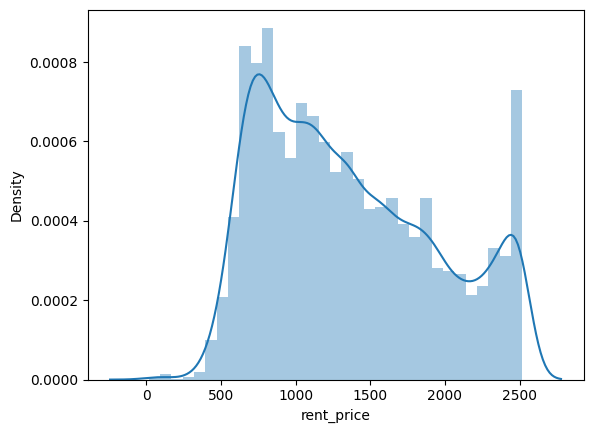

In [34]:
sns.distplot(viviendas2['rent_price'])

<AxesSubplot:xlabel='buy_price', ylabel='Density'>

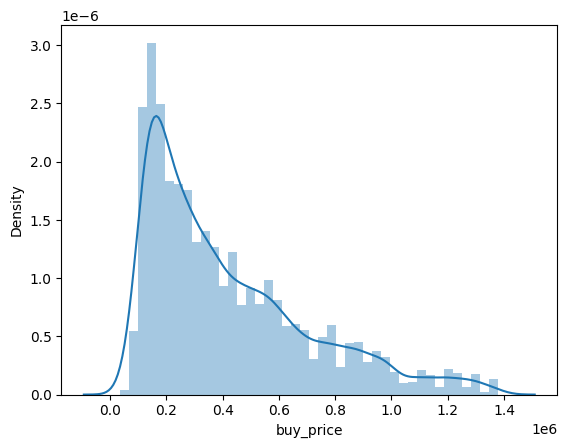

In [35]:

sns.distplot(viviendas2['buy_price'])

<AxesSubplot:xlabel='sq_mt_built', ylabel='Density'>

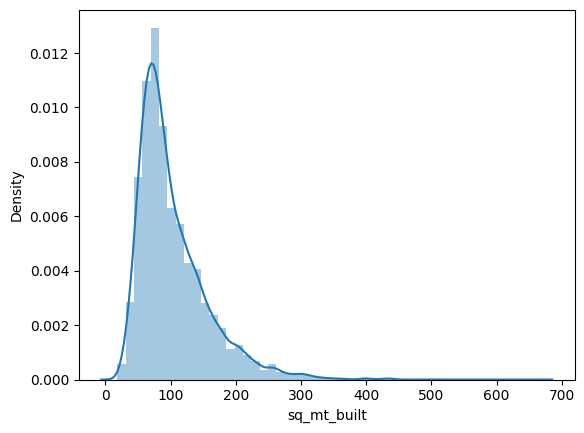

In [36]:
sns.distplot(viviendas2['sq_mt_built'])

In [37]:
viviendas2['buy_price'].describe()
# con estos resultados decido despues eliminar todos los valores por encima 800.000 euros

count    1.377400e+04
mean     4.190858e+05
std      2.898999e+05
min      3.600000e+04
25%      1.850000e+05
50%      3.300000e+05
75%      5.750000e+05
max      1.380000e+06
Name: buy_price, dtype: float64

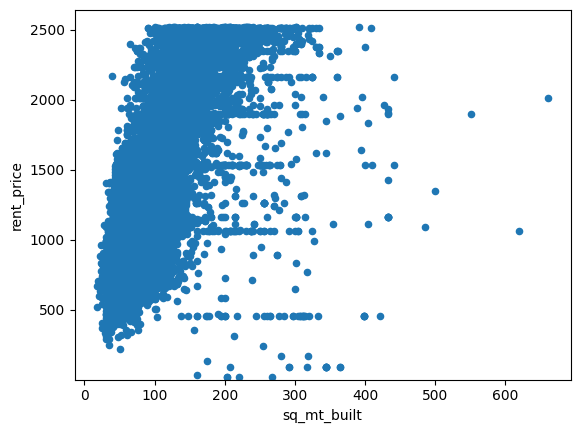

In [38]:
var = 'sq_mt_built'
data = pd.concat([viviendas2['rent_price'], viviendas2[var]], axis=1)
data.plot.scatter(x=var, y='rent_price', ylim=(0.800000));

In [39]:
viviendas2.columns

Index(['id', 'title', 'subtitle', 'sq_mt_built', 'n_rooms', 'n_bathrooms',
       'is_exact_address_hidden', 'floor', 'is_floor_under', 'neighborhood_id',
       'rent_price', 'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'has_terrace', 'has_storage_room', 'has_green_zones',
       'energy_certificate', 'has_parking', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east',
       'barrio'],
      dtype='object')

In [40]:
viviendas2.columns

Index(['id', 'title', 'subtitle', 'sq_mt_built', 'n_rooms', 'n_bathrooms',
       'is_exact_address_hidden', 'floor', 'is_floor_under', 'neighborhood_id',
       'rent_price', 'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'has_terrace', 'has_storage_room', 'has_green_zones',
       'energy_certificate', 'has_parking', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east',
       'barrio'],
      dtype='object')

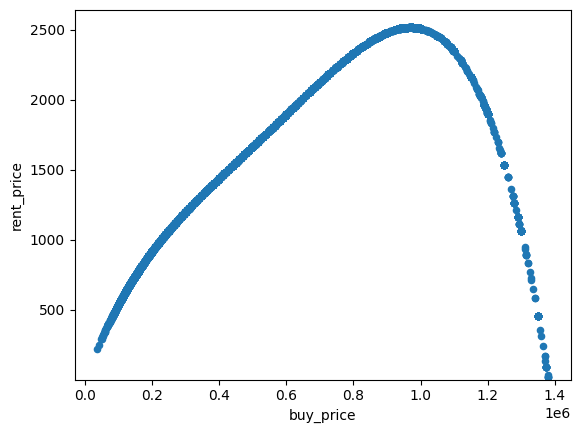

In [41]:
var = 'buy_price'
data = pd.concat([viviendas2['rent_price'], viviendas2[var]], axis=1)
data.plot.scatter(x=var, y='rent_price', ylim=(0.800000));

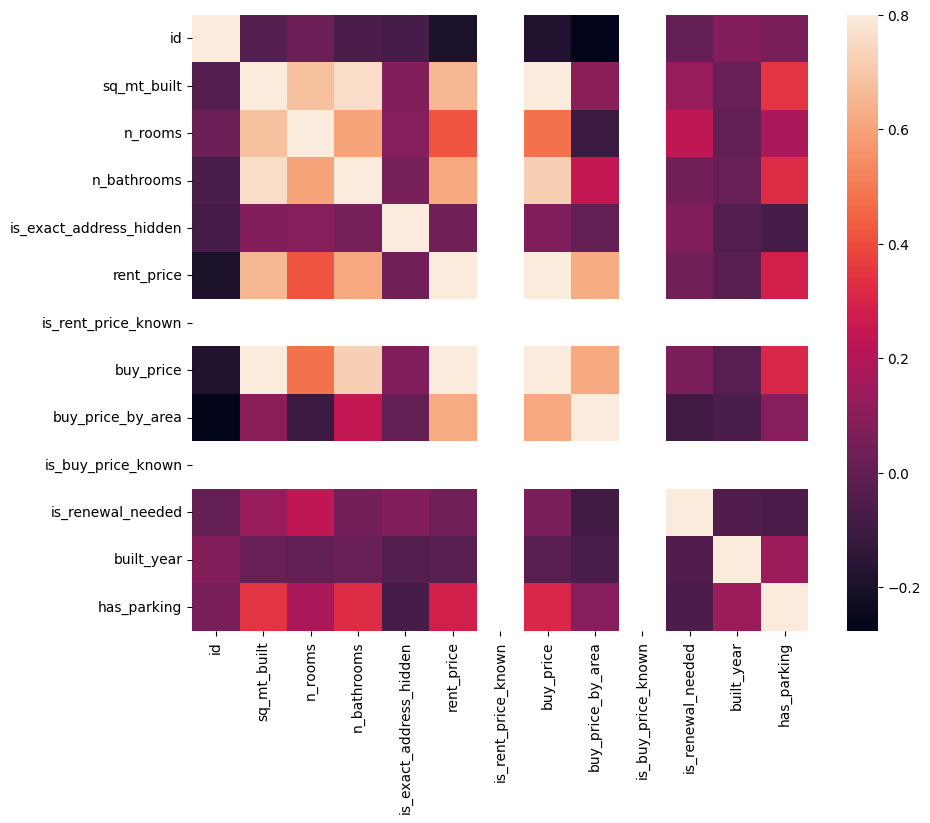

In [42]:
corrmat = viviendas2.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

In [43]:
viviendas2.columns

Index(['id', 'title', 'subtitle', 'sq_mt_built', 'n_rooms', 'n_bathrooms',
       'is_exact_address_hidden', 'floor', 'is_floor_under', 'neighborhood_id',
       'rent_price', 'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'has_terrace', 'has_storage_room', 'has_green_zones',
       'energy_certificate', 'has_parking', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east',
       'barrio'],
      dtype='object')

Elimino variables cualitativas para estudiar los heatmap.


In [44]:
viviendas_analisis=viviendas2
viviendas_analisis= viviendas2.drop([ 'title', 'subtitle', 'floor', 'is_floor_under', 'neighborhood_id',
       'is_rent_price_known', 'is_buy_price_known', 'house_type_id', 'is_new_development', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift','is_renewal_needed','is_exact_address_hidden',
       'is_exterior', 'has_terrace', 'has_storage_room', 'has_green_zones',
       'energy_certificate', 'has_parking', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east'], axis=1)
viviendas_analisis.shape

(13774, 9)

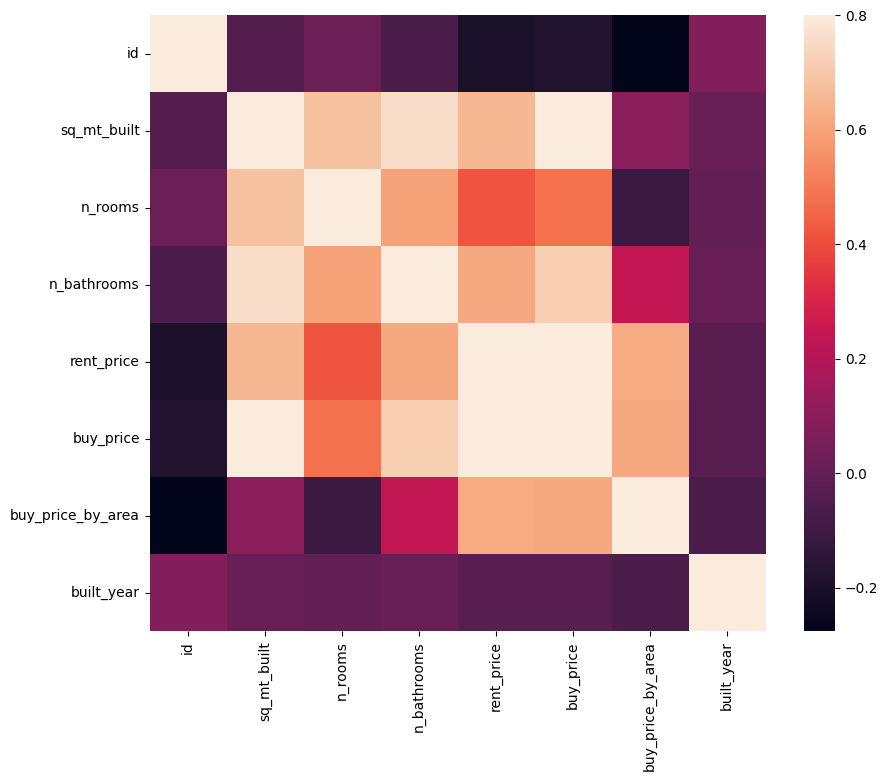

In [45]:
corrmat = viviendas_analisis.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

In [46]:
viviendas_analisis.columns

Index(['id', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'rent_price',
       'buy_price', 'buy_price_by_area', 'built_year', 'barrio'],
      dtype='object')

In [47]:
viviendas_analisis= viviendas_analisis.reindex(columns=['id', 'sq_mt_built', 'n_rooms', 'n_bathrooms','built_year','buy_price',
       'buy_price_by_area','rent_price'])

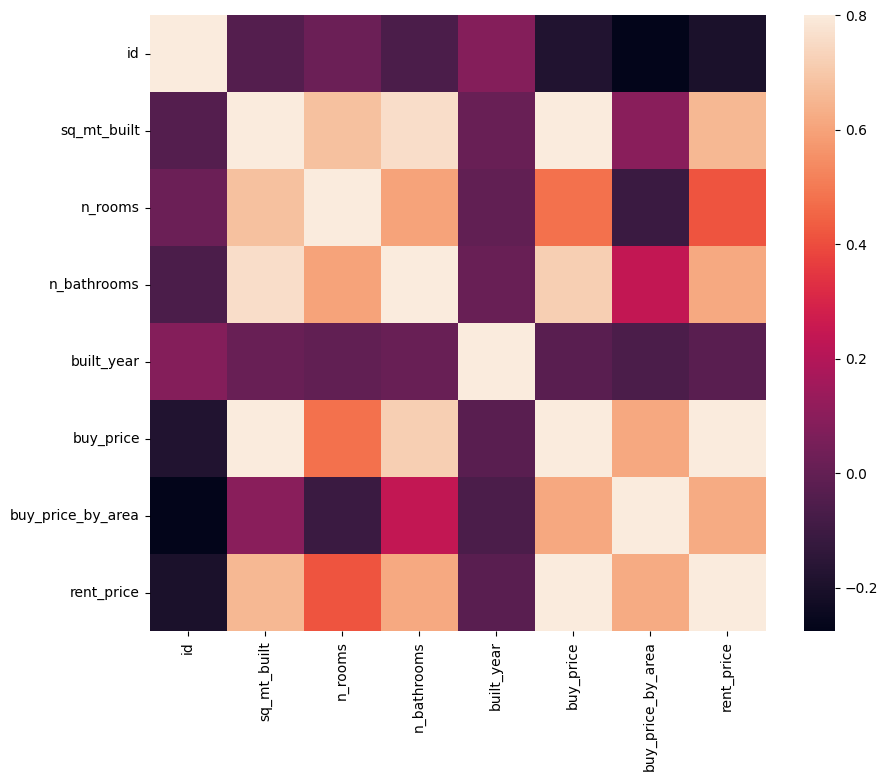

In [48]:
corrmat = viviendas_analisis.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

In [49]:
viviendas_matrizcorrelaccion= viviendas_analisis.drop(['id','n_bathrooms','built_year'], axis=1)

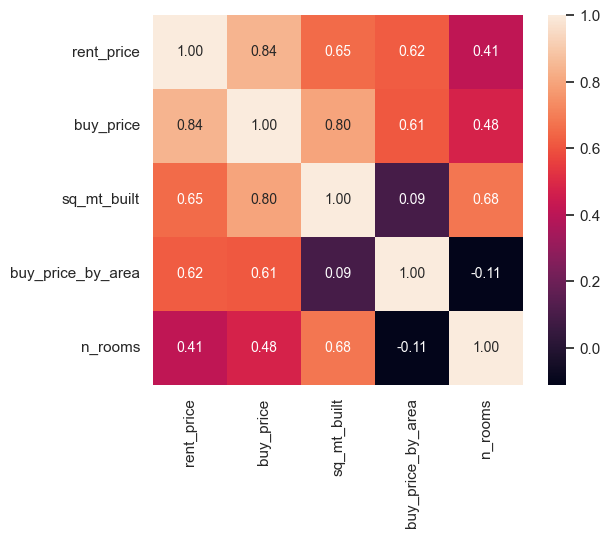

<Figure size 640x480 with 0 Axes>

In [50]:
k = 10 #number of variables for heatmap
corrmat = viviendas_matrizcorrelaccion.corr()
cols = corrmat.nlargest(k, 'rent_price')['rent_price'].index
cm = np.corrcoef(viviendas_matrizcorrelaccion[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
plt.savefig("Ejemplo2.jpg",bbox_inches='tight')

## 3.1.-Eliminamos los outlayers

In [51]:
#limpiamos valores extremos
viviendas3=viviendas2.loc[viviendas2.built_year<=2026]
viviendas3= viviendas3.loc[viviendas3.sq_mt_built<=200]
viviendas3= viviendas3.loc[viviendas3.buy_price<=800000]
viviendas3= viviendas3.loc[viviendas3.n_rooms!=0]

viviendas3.shape
#vivienda2 tiene todas las caracteristicas


(5673, 35)

## 3.2.-Vamos a comparar los barrios utilizando groupby()

In [52]:
viviendas3['barrio'].unique()

array(['Usera', 'Tetuan', 'Retiro', 'Puente de Vallecas', 'Moncloa',
       'Moratalaz', 'Latina', 'Chamberi', 'Ciudad Lineal', 'Chamartin',
       'Centro', 'Carabanchel', 'Salamanca', 'Arganzuela'], dtype=object)

In [53]:
viviendas3.columns

Index(['id', 'title', 'subtitle', 'sq_mt_built', 'n_rooms', 'n_bathrooms',
       'is_exact_address_hidden', 'floor', 'is_floor_under', 'neighborhood_id',
       'rent_price', 'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'has_terrace', 'has_storage_room', 'has_green_zones',
       'energy_certificate', 'has_parking', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east',
       'barrio'],
      dtype='object')

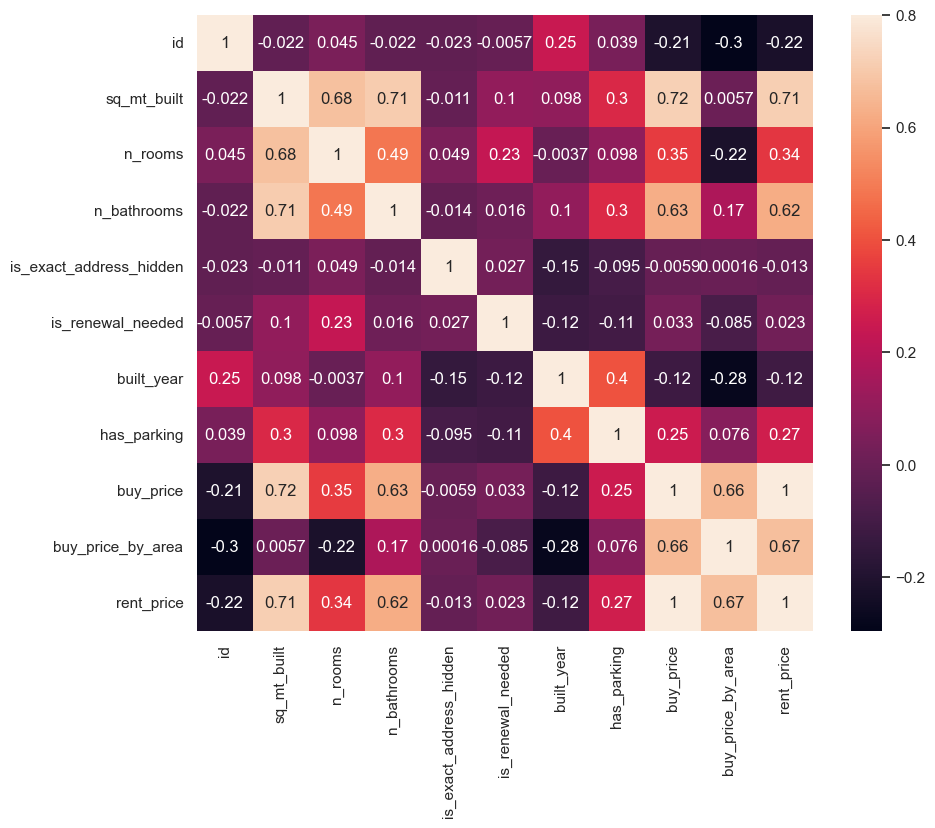

In [54]:
viviendas_correlaciongrande= viviendas3.drop(['is_buy_price_known','is_rent_price_known'], axis=1)


viviendas_correlaciongrande= viviendas_correlaciongrande.reindex(columns=['id', 'title', 'subtitle', 'sq_mt_built', 'n_rooms', 'n_bathrooms',
       'is_exact_address_hidden', 'floor', 'is_floor_under', 'neighborhood_id','house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'has_terrace', 'has_storage_room', 'has_green_zones',
       'energy_certificate', 'has_parking', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east',
       'barrio','buy_price','buy_price_by_area','rent_price'])



corrmat = viviendas_correlaciongrande.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True, annot = True);

In [55]:
viviendas_correlaciongrande.dtypes

id                           int64
title                       object
subtitle                    object
sq_mt_built                float64
n_rooms                      int64
n_bathrooms                float64
is_exact_address_hidden       bool
floor                       object
is_floor_under              object
neighborhood_id             object
house_type_id               object
is_renewal_needed             bool
is_new_development          object
built_year                 float64
has_central_heating         object
has_individual_heating      object
has_ac                      object
has_fitted_wardrobes        object
has_lift                    object
is_exterior                 object
has_terrace                 object
has_storage_room            object
has_green_zones             object
energy_certificate          object
has_parking                   bool
is_orientation_north        object
is_orientation_west         object
is_orientation_south        object
is_orientation_east 

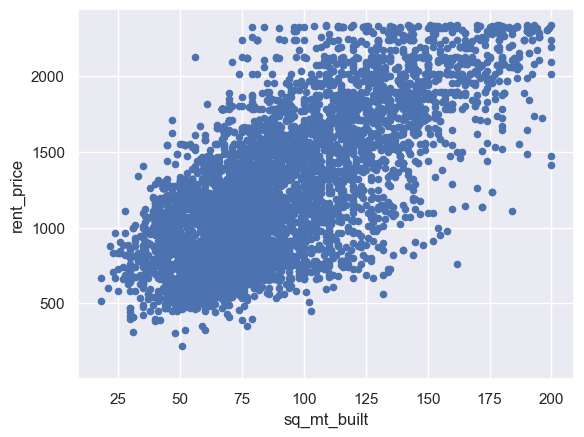

In [56]:
var = 'sq_mt_built'
data = pd.concat([viviendas3['rent_price'], viviendas3[var]], axis=1)
data.plot.scatter(x=var, y='rent_price', ylim=(1));

In [57]:
viviendas3.groupby('barrio').rent_price.mean()


barrio
Arganzuela            1367.395238
Carabanchel            848.686883
Centro                1482.111276
Chamartin             1593.177249
Chamberi              1690.808791
Ciudad Lineal         1116.621399
Latina                 863.979167
Moncloa               1501.778947
Moratalaz              995.051282
Puente de Vallecas     741.719124
Retiro                1620.723636
Salamanca             1645.439560
Tetuan                1214.328018
Usera                  822.045045
Name: rent_price, dtype: float64

In [58]:
viviendas3.groupby('barrio').buy_price.mean()

barrio
Arganzuela            376037.500000
Carabanchel           187239.897038
Centro                426115.178042
Chamartin             470545.243386
Chamberi              513840.417582
Ciudad Lineal         283402.382716
Latina                192276.656250
Moncloa               435705.105263
Moratalaz             235839.987179
Puente de Vallecas    154248.539841
Retiro                482516.141818
Salamanca             493161.721612
Tetuan                318663.138952
Usera                 177099.648649
Name: buy_price, dtype: float64

In [59]:
viviendas4= viviendas3.groupby('barrio')

In [60]:
viviendas3.columns

Index(['id', 'title', 'subtitle', 'sq_mt_built', 'n_rooms', 'n_bathrooms',
       'is_exact_address_hidden', 'floor', 'is_floor_under', 'neighborhood_id',
       'rent_price', 'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'has_terrace', 'has_storage_room', 'has_green_zones',
       'energy_certificate', 'has_parking', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east',
       'barrio'],
      dtype='object')

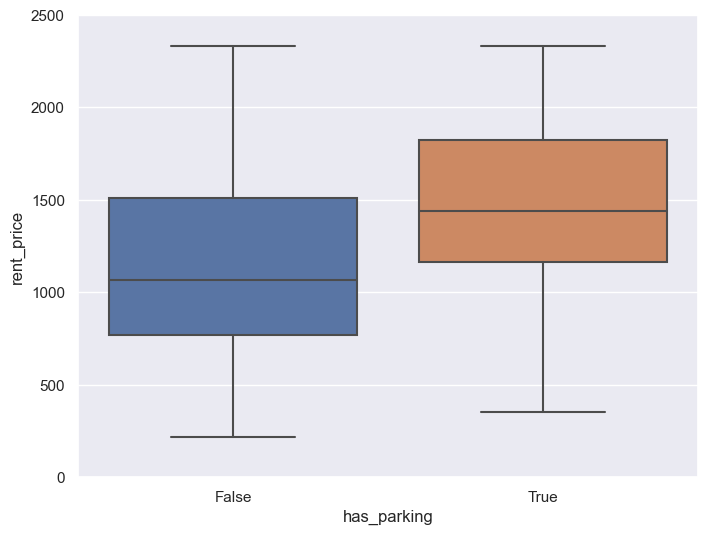

In [61]:
var = 'has_parking'
data = pd.concat([viviendas3['rent_price'], viviendas3[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent_price", data=data)
fig.axis(ymin=0, ymax=2500);

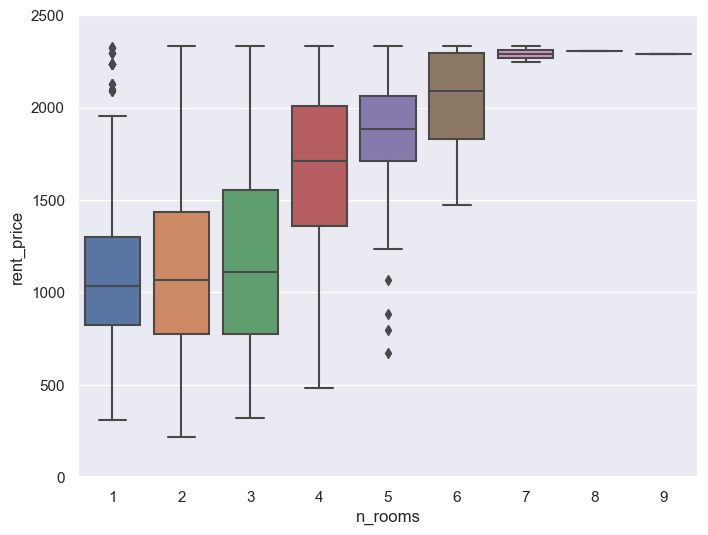

In [62]:
var = 'n_rooms'
data = pd.concat([viviendas3['rent_price'], viviendas3[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent_price", data=data)
fig.axis(ymin=0, ymax=2500);

# se observa el atractivo que pueden representar los pisos de 4 habitaciones frenta a los de 3

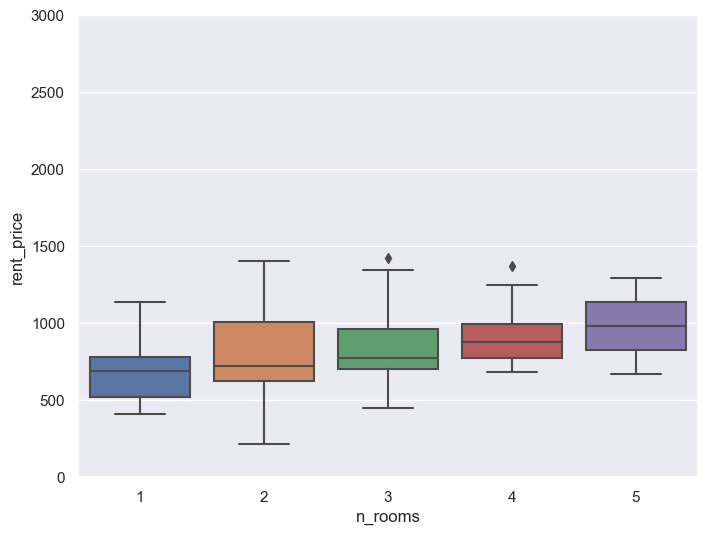

In [63]:
var = 'n_rooms'
data = pd.concat([viviendas3.loc[viviendas3.barrio=='Usera']['rent_price'], viviendas3.loc[viviendas3.barrio=='Usera'][var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent_price", data=data)
fig.axis(ymin=0, ymax=3000);

In [64]:
viviendas3.groupby('barrio').rent_price.mean()
# para ver como agrupamos los barrios

barrio
Arganzuela            1367.395238
Carabanchel            848.686883
Centro                1482.111276
Chamartin             1593.177249
Chamberi              1690.808791
Ciudad Lineal         1116.621399
Latina                 863.979167
Moncloa               1501.778947
Moratalaz              995.051282
Puente de Vallecas     741.719124
Retiro                1620.723636
Salamanca             1645.439560
Tetuan                1214.328018
Usera                  822.045045
Name: rent_price, dtype: float64

In [65]:
viviendas_baratas=viviendas3.loc[viviendas3.barrio.isin(['Carabanchel','Latina','Usera','Puente de Vallecas'])]

In [66]:
viviendas_caras=viviendas3.loc[viviendas3.barrio.isin(['Arganzuela','Centro','Retiro','Salamanca','Chamberi'])]

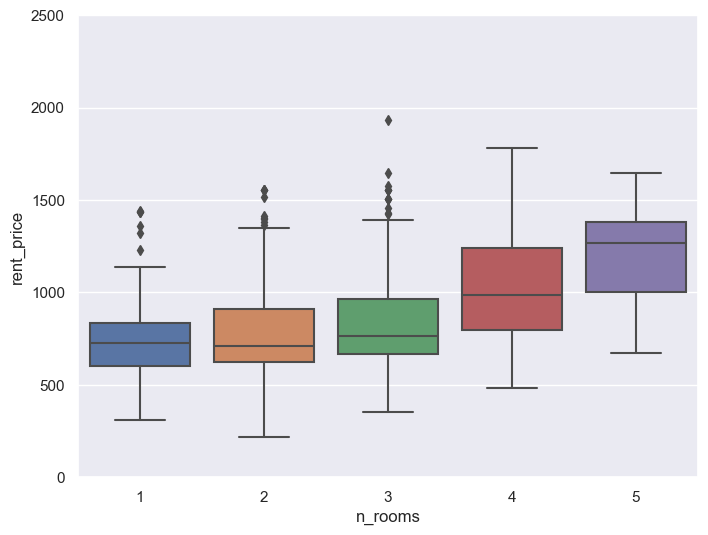

In [67]:
var = 'n_rooms'
data = pd.concat([viviendas_baratas['rent_price'], viviendas_baratas[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent_price", data=data)
fig.axis(ymin=0, ymax=2500);

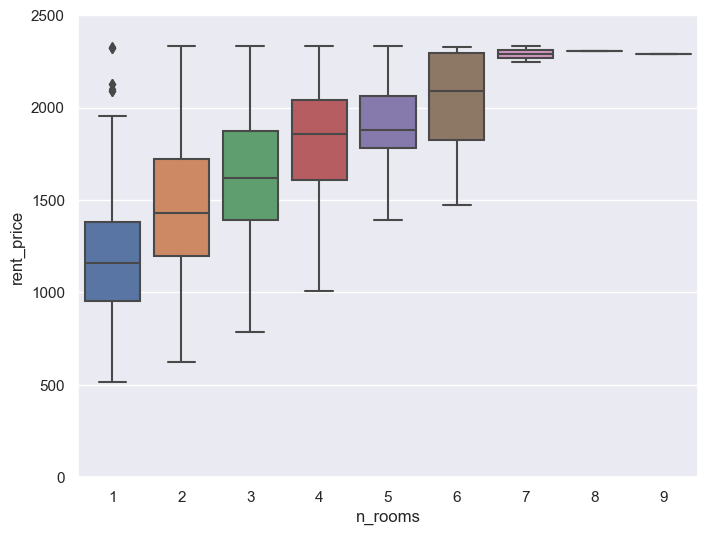

In [68]:
var = 'n_rooms'
data = pd.concat([viviendas_caras['rent_price'], viviendas_caras[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent_price", data=data)
fig.axis(ymin=0, ymax=2500);

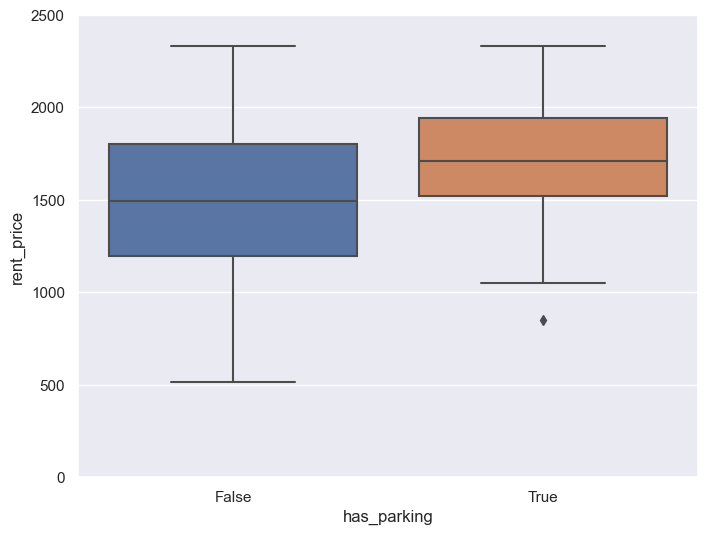

In [69]:
var = 'has_parking'
data = pd.concat([viviendas_caras['rent_price'], viviendas_caras[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent_price", data=data)
fig.axis(ymin=0, ymax=2500);

In [70]:
viviendas3.barrio.unique()

array(['Usera', 'Tetuan', 'Retiro', 'Puente de Vallecas', 'Moncloa',
       'Moratalaz', 'Latina', 'Chamberi', 'Ciudad Lineal', 'Chamartin',
       'Centro', 'Carabanchel', 'Salamanca', 'Arganzuela'], dtype=object)

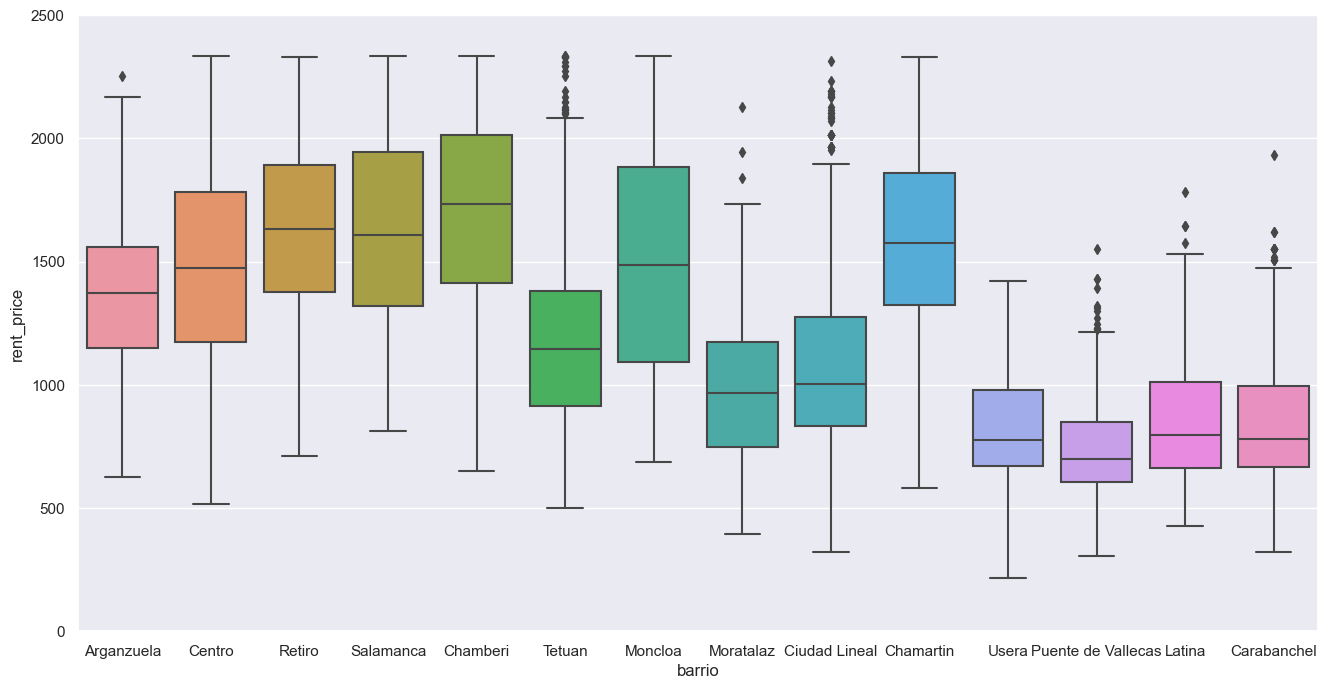

In [71]:
viviendas3
var = 'barrio'
data = pd.concat([viviendas3['rent_price'], viviendas3[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="rent_price", data=data, order=[ 'Arganzuela','Centro','Retiro','Salamanca','Chamberi','Tetuan', 'Moncloa',
       'Moratalaz',  'Ciudad Lineal', 'Chamartin','Usera', 'Puente de Vallecas', 'Latina','Carabanchel'])
fig.axis(ymin=0, ymax=2500);

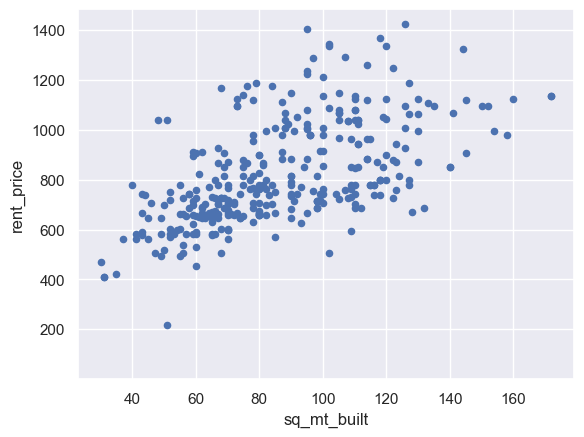

In [72]:
var = 'sq_mt_built'
data = pd.concat([viviendas3.loc[viviendas3.barrio=='Usera']['rent_price'], viviendas3.loc[viviendas3.barrio=='Usera'][var]], axis=1)
data.plot.scatter(x=var, y='rent_price', ylim=(0.800000));

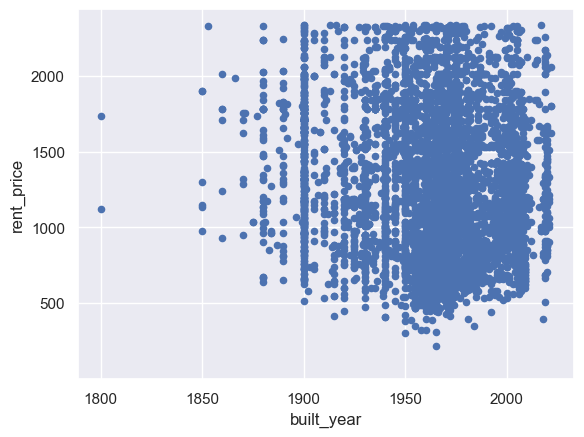

In [73]:
var = 'built_year'
data = pd.concat([viviendas3['rent_price'], viviendas3[var]], axis=1)
data.plot.scatter(x=var, y='rent_price', ylim=(0.800000));

In [74]:
viviendas3.columns

Index(['id', 'title', 'subtitle', 'sq_mt_built', 'n_rooms', 'n_bathrooms',
       'is_exact_address_hidden', 'floor', 'is_floor_under', 'neighborhood_id',
       'rent_price', 'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'has_terrace', 'has_storage_room', 'has_green_zones',
       'energy_certificate', 'has_parking', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east',
       'barrio'],
      dtype='object')

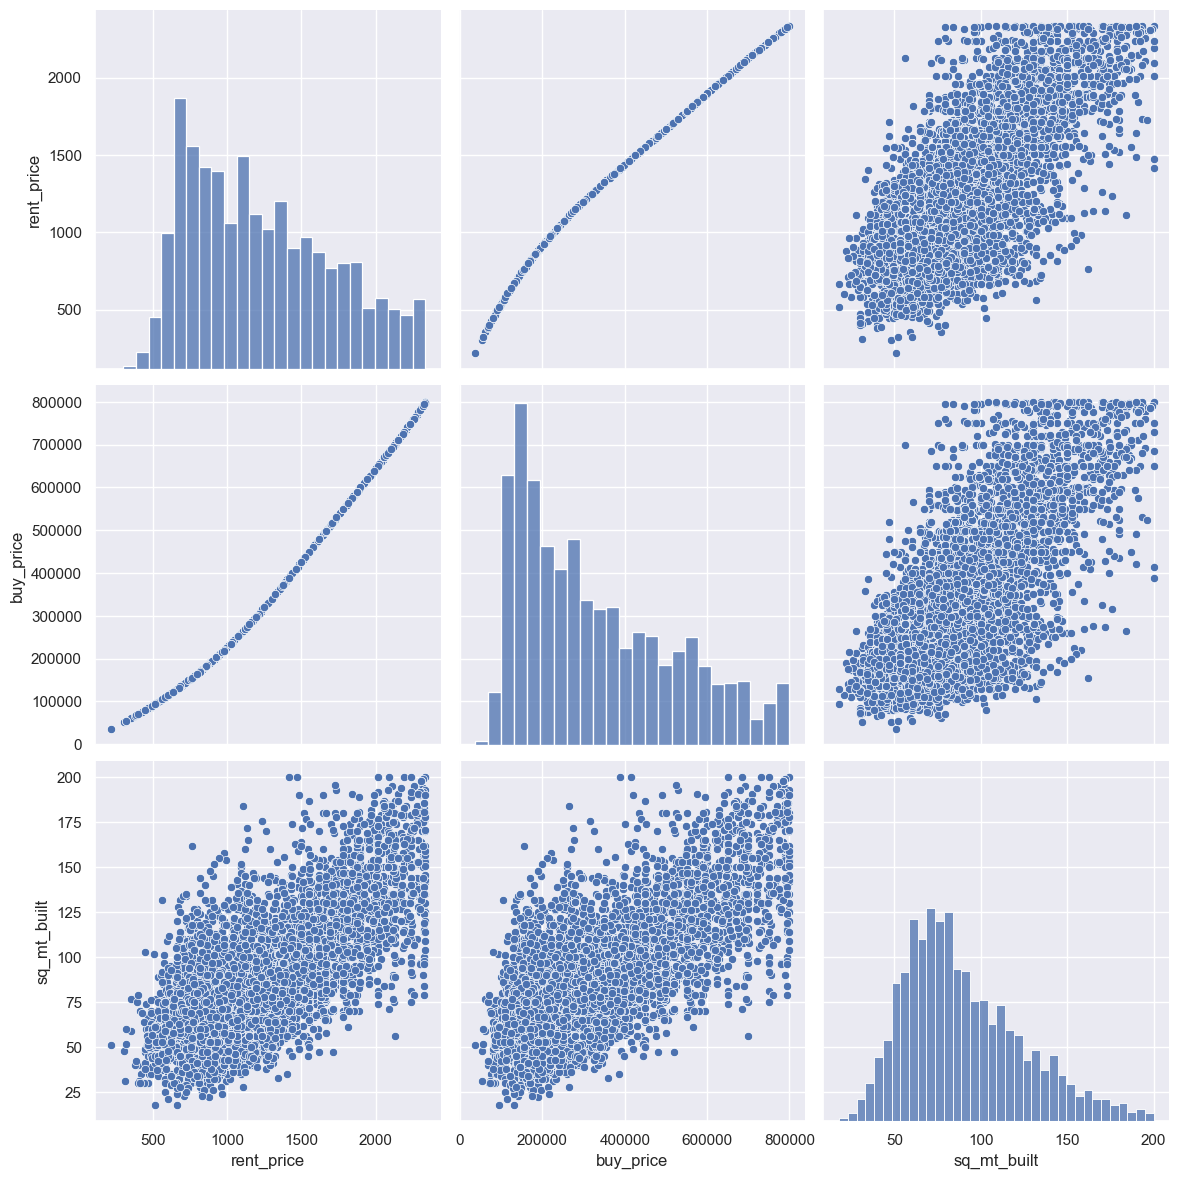

In [75]:
sns.set()
cols = ['rent_price','buy_price' ,'sq_mt_built']
sns.pairplot(viviendas3[cols], size = 4)
plt.show();

In [76]:
viviendas_analisis=viviendas3
viviendas_analisis= viviendas3.drop([ 'title', 'subtitle', 'floor', 'is_floor_under', 'neighborhood_id',
       'is_rent_price_known', 'is_buy_price_known', 'house_type_id', 'is_new_development', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift','is_renewal_needed','is_exact_address_hidden',
       'is_exterior', 'has_terrace', 'has_storage_room', 'has_green_zones',
       'energy_certificate', 'has_parking', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east','id','n_bathrooms','built_year'], axis=1)
viviendas_analisis.shape
viviendas_analisis= viviendas_analisis.reindex(columns=['id', 'sq_mt_built', 'n_rooms','buy_price',
       'buy_price_by_area','rent_price'])

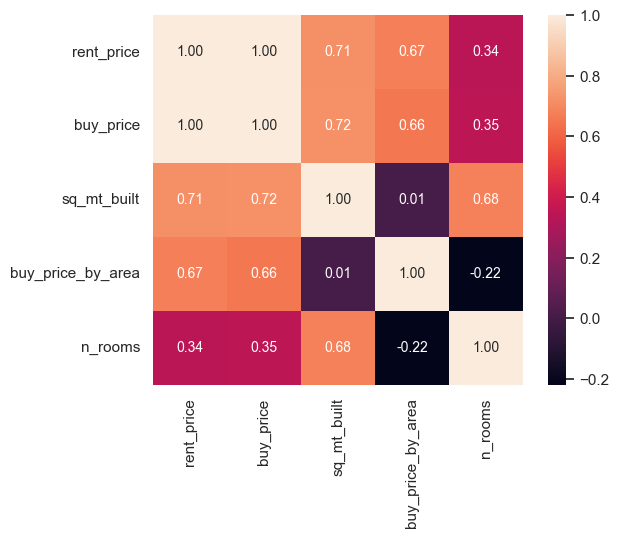

<Figure size 640x480 with 0 Axes>

In [77]:
k = 10 #number of variables for heatmap
corrmat = viviendas_analisis.corr()
cols = corrmat.nlargest(k, 'rent_price')['rent_price'].index
cm = np.corrcoef(viviendas_analisis[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
plt.savefig("Ejemplo2.jpg")

In [78]:
viviendas3.to_csv('viviendas_Madrid.csv')

# 4.-Machine Learning

Hasta ahora mi variable objetivo ha sido el precio de alquiler, pues mi objetivo con este estudio es encontrar una vivienda atractiva como inversión, debido a la alta rentabilidad que obtengamos con su alquiler en función de su precio de compra. Solo con el análisis exploratorio de los datos obtenemos que las variables que más influyen en el precio de alquiler de las viviendas de Madrid ( relación lineal) son: buy_price_by_area, sq_mt_built, n_bathrooms, n_rooms

In [1]:
import pandas as pd

In [2]:

import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import skew

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn


In [3]:
houses= pd.read_csv('houses_Madrid.csv', index_col=0)

In [4]:
houses.columns

Index(['id', 'title', 'subtitle', 'sq_mt_built', 'sq_mt_useful', 'n_rooms',
       'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude', 'longitude',
       'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',
       'is_parking_included_in_price', 'parking_price', 'is

In [5]:
houses.notnull().sum()

id                              21742
title                           21742
subtitle                        21742
sq_mt_built                     21616
sq_mt_useful                     8228
n_rooms                         21742
n_bathrooms                     21726
n_floors                         1437
sq_mt_allotment                  1432
latitude                            0
longitude                           0
raw_address                     16277
is_exact_address_hidden         21742
street_name                     15837
street_number                    6300
portal                              0
floor                           19135
is_floor_under                  20572
door                                0
neighborhood_id                 21742
operation                       21742
rent_price                      21742
rent_price_by_area                  0
is_rent_price_known             21742
buy_price                       21742
buy_price_by_area               21742
is_buy_price

In [6]:
houses.shape

(21742, 57)

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder, RobustScaler

from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import svm
from sklearn.svm import SVR
import xgboost as xgb



from sklearn.pipeline import Pipeline


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## 4.1. Limpieza nuevo archivo

In [8]:
#Nos quedamos interior M-40

houses= houses.loc[houses.neighborhood_id.isin(['Neighborhood 119: Orcasitas (1931.95 €/m2) - District 18: Usera',
       'Neighborhood 121: San Fermín (1912.8 €/m2) - District 18: Usera',
       'Neighborhood 118: Moscardó (2284.48 €/m2) - District 18: Usera',
       'Neighborhood 120: Pradolongo (2068.64 €/m2) - District 18: Usera',
       'Neighborhood 122: Zofío (1941.38 €/m2) - District 18: Usera',
       'Neighborhood 117: Almendrales (2205.31 €/m2) - District 18: Usera',
       'Neighborhood 123: 12 de Octubre-Orcasur (1637.13 €/m2) - District 18: Usera',
       'Neighborhood 115: Valdeacederas (3163.8 €/m2) - District 17: Tetuán',
       'Neighborhood 114: Cuzco-Castillejos (4347.59 €/m2) - District 17: Tetuán',
       'Neighborhood 113: Cuatro Caminos (4247.49 €/m2) - District 17: Tetuán',
       'Neighborhood 111: Bellas Vistas (3536.07 €/m2) - District 17: Tetuán',
       'Neighborhood 112: Berruguete (3273.56 €/m2) - District 17: Tetuán',
       'Neighborhood 116: Ventilla-Almenara (3314.54 €/m2) - District 17: Tetuán',
       'Neighborhood 96: Niño Jesús (4935.6 €/m2) - District 14: Retiro',
       'Neighborhood 93: Ibiza (5492.17 €/m2) - District 14: Retiro',
       'Neighborhood 91: Adelfas (4020.62 €/m2) - District 14: Retiro',
       'Neighborhood 95: Pacífico (4105.12 €/m2) - District 14: Retiro',
       'Neighborhood 94: Jerónimos (6739.32 €/m2) - District 14: Retiro',
       'Neighborhood 92: Estrella (4246.58 €/m2) - District 14: Retiro',
       'Neighborhood 87: Palomeras sureste (2076.58 €/m2) - District 13: Puente de Vallecas',
       'Neighborhood 86: Palomeras Bajas (1983.7 €/m2) - District 13: Puente de Vallecas',
       'Neighborhood 89: San Diego (2007.79 €/m2) - District 13: Puente de Vallecas',
       'Neighborhood 85: Entrevías (1574.36 €/m2) - District 13: Puente de Vallecas',
       'Neighborhood 90: Numancia (2081.94 €/m2) - District 13: Puente de Vallecas',
       'Neighborhood 88: Portazgo (1896.75 €/m2) - District 13: Puente de Vallecas',
       'Neighborhood 72: Aravaca (3600.4 €/m2) - District 11: Moncloa',
       'Neighborhood 73: Argüelles (4807.69 €/m2) - District 11: Moncloa',
       'Neighborhood 75: Ciudad Universitaria (3810.08 €/m2) - District 11: Moncloa',
       'Neighborhood 77: Valdezarza (2951.77 €/m2) - District 11: Moncloa',
       'Neighborhood 74: Casa de Campo (3630.68 €/m2) - District 11: Moncloa',
       'Neighborhood 78: Valdemarín (4249.04 €/m2) - District 11: Moncloa',
       'Neighborhood 76: El Plantío (2569.96 €/m2) - District 11: Moncloa',
       'Neighborhood 81: Fontarrón (2319.44 €/m2) - District 12: Moratalaz',
       'Neighborhood 84: Vinateros (2538.1 €/m2) - District 12: Moratalaz',
       'Neighborhood 82: Marroquina (2928.57 €/m2) - District 12: Moratalaz',
       'Neighborhood 83: Media Legua (2803.11 €/m2) - District 12: Moratalaz',
       'Neighborhood 80: Horcajo (None €/m2) - District 12: Moratalaz',
       'Neighborhood 79: Pavones (None €/m2) - District 12: Moratalaz',
       'Neighborhood 70: Puerta del Ángel (2443.62 €/m2) - District 10: Latina',
       'Neighborhood 67: Aluche (2190.48 €/m2) - District 10: Latina',
       'Neighborhood 69: Lucero (2363.25 €/m2) - District 10: Latina',
       'Neighborhood 71: Los Cármenes (2458.61 €/m2) - District 10: Latina',
       'Neighborhood 66: Águilas (2110.34 €/m2) - District 10: Latina',
       'Neighborhood 68: Campamento (2275.63 €/m2) - District 10: Latina',
       'Neighborhood 65: Cuatro Vientos (None €/m2) - District 10: Latina',
       
       'Neighborhood 34: Gaztambide (5000.0 €/m2) - District 6: Chamberí',
       'Neighborhood 37: Nuevos Ministerios-Ríos Rosas (5000.0 €/m2) - District 6: Chamberí',
       'Neighborhood 32: Almagro (6564.27 €/m2) - District 6: Chamberí',
       'Neighborhood 35: Trafalgar (5640.18 €/m2) - District 6: Chamberí',
       'Neighborhood 33: Arapiles (4869.57 €/m2) - District 6: Chamberí',
       'Neighborhood 36: Vallehermoso (4548.3 €/m2) - District 6: Chamberí',
       'Neighborhood 42: Ventas (2686.93 €/m2) - District 7: Ciudad Lineal',
       'Neighborhood 39: Pueblo Nuevo (2578.87 €/m2) - District 7: Ciudad Lineal',
       'Neighborhood 43: Atalaya (None €/m2) - District 7: Ciudad Lineal',
       'Neighborhood 40: Quintana (2900.58 €/m2) - District 7: Ciudad Lineal',
       'Neighborhood 46: San Juan Bautista (4098.7 €/m2) - District 7: Ciudad Lineal',
       'Neighborhood 44: Colina (4677.53 €/m2) - District 7: Ciudad Lineal',
       'Neighborhood 45: Costillares (4235.69 €/m2) - District 7: Ciudad Lineal',
       'Neighborhood 38: Concepción (3341.09 €/m2) - District 7: Ciudad Lineal',
       'Neighborhood 41: San Pascual (4015.76 €/m2) - District 7: Ciudad Lineal',
       'Neighborhood 28: El Viso (6255.45 €/m2) - District 5: Chamartín',
       'Neighborhood 29: Nueva España (5363.75 €/m2) - District 5: Chamartín',
       'Neighborhood 26: Castilla (4354.35 €/m2) - District 5: Chamartín',
       'Neighborhood 31: Bernabéu-Hispanoamérica (5170.22 €/m2) - District 5: Chamartín',
       'Neighborhood 30: Prosperidad (4255.84 €/m2) - District 5: Chamartín',
       'Neighborhood 27: Ciudad Jardín (4572.45 €/m2) - District 5: Chamartín',
       'Neighborhood 22: Lavapiés-Embajadores (4448.3 €/m2) - District 4: Centro',
       'Neighborhood 15: Opañel (2235.32 €/m2) - District 3: Carabanchel',
       'Neighborhood 14: Comillas (2527.59 €/m2) - District 3: Carabanchel',
       'Neighborhood 12: Abrantes (1964.55 €/m2) - District 3: Carabanchel',
       'Neighborhood 19: San Isidro (2323.93 €/m2) - District 3: Carabanchel',
       'Neighborhood 17: Puerta Bonita (1980.04 €/m2) - District 3: Carabanchel',
       'Neighborhood 18: Vista Alegre (2048.47 €/m2) - District 3: Carabanchel',
       'Neighborhood 16: Pau de Carabanchel (3120.54 €/m2) - District 3: Carabanchel',
       'Neighborhood 13: Buena Vista (1886.6 €/m2) - District 3: Carabanchel',
       'Neighborhood 21: Huertas-Cortes (5000.0 €/m2) - District 4: Centro',
       'Neighborhood 23: Malasaña-Universidad (5196.25 €/m2) - District 4: Centro',
       'Neighborhood 20: Chueca-Justicia (6029.36 €/m2) - District 4: Centro',
       'Neighborhood 24: Palacio (4693.52 €/m2) - District 4: Centro',
       'Neighborhood 25: Sol (5390.99 €/m2) - District 4: Centro',
       'Neighborhood 102: Recoletos (8392.43 €/m2) - District 15: Salamanca',
       'Neighborhood 99: Goya (5887.64 €/m2) - District 15: Salamanca',
       'Neighborhood 101: Lista (5681.21 €/m2) - District 15: Salamanca',
       'Neighborhood 97: Castellana (6882.35 €/m2) - District 15: Salamanca',
       'Neighborhood 100: Guindalera (4367.9 €/m2) - District 15: Salamanca',
       'Neighborhood 98: Fuente del Berro (4452.82 €/m2) - District 15: Salamanca',
       'Neighborhood 3: Imperial (4098.59 €/m2) - District 1: Arganzuela',
       'Neighborhood 1: Chopera (3783.78 €/m2) - District 1: Arganzuela',
       'Neighborhood 5: Acacias (4208.0 €/m2) - District 1: Arganzuela',
       'Neighborhood 2: Delicias (3972.6 €/m2) - District 1: Arganzuela',
       'Neighborhood 6: Palos de Moguer (3975.0 €/m2) - District 1: Arganzuela',
       'Neighborhood 4: Legazpi (4486.93 €/m2) - District 1: Arganzuela'
])]

In [9]:
#Nos quedamos pisos y áticos
houses= houses.loc[houses.house_type_id.isin(['HouseType 1: Pisos','HouseType 5: Áticos'])]



In [10]:
houses.shape

(15161, 57)

In [11]:
#Eliminamos errores de los datos

houses= houses.loc[houses.n_rooms!=0]



In [12]:
houses.shape

(15136, 57)

In [13]:
houses=houses.dropna(subset=['sq_mt_built', 'n_bathrooms'])

In [14]:
#Eliminamos variables que por el tipo de datos que aporta he visto que son inútiles: como operation porque todos son sale

#'id', 'title', 'subtitle','raw_address','street_name','operation','is_new_development','is_buy_price_known','is_rent_price_known','has_central_heating'


In [15]:
#Eliminamos variables  con pocos datos (menos 40%)

#'sq_mt_useful','street_number','has_ac','has_fitted_wardrobes', 'has_pool','has_terrace', 'has_balcony', 'has_storage_room', 'is_accessible','has_green_zones','has_parking','parking_price','is_parking_included_in_price'

#'has_terrace', 'has_balcony' podriamos suponer 0 en los que no tienen datos

#'built_year' tambien se podria hacer algo

# ver si meto latitud y longitud

In [16]:
y= houses['buy_price']
X= houses[['sq_mt_built', 'n_rooms', 'n_bathrooms', 'is_exact_address_hidden','floor', 'is_floor_under', 'neighborhood_id',
       'house_type_id', 'is_renewal_needed','has_individual_heating', 'has_lift','is_exterior', 'energy_certificate', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east']]


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15130 entries, 1837 to 21741
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sq_mt_built              15130 non-null  float64
 1   n_rooms                  15130 non-null  int64  
 2   n_bathrooms              15130 non-null  float64
 3   is_exact_address_hidden  15130 non-null  bool   
 4   floor                    14716 non-null  object 
 5   is_floor_under           14716 non-null  object 
 6   neighborhood_id          15130 non-null  object 
 7   house_type_id            15130 non-null  object 
 8   is_renewal_needed        15130 non-null  bool   
 9   has_individual_heating   9943 non-null   object 
 10  has_lift                 14799 non-null  object 
 11  is_exterior              14349 non-null  object 
 12  energy_certificate       15130 non-null  object 
 13  is_orientation_north     8093 non-null   object 
 14  is_orientation_west

In [18]:
X.floor.value_counts()

1                       3517
2                       2804
3                       2295
4                       1748
Bajo                    1509
5                        996
6                        736
7                        413
8                        246
Entreplanta exterior     177
9                        134
Semi-sótano exterior      48
Semi-sótano interior      31
Entreplanta interior      30
Sótano interior           21
Sótano                     5
Sótano exterior            4
Entreplanta                2
Name: floor, dtype: int64

In [19]:
#floor

#creo que los eliminare, de momento relleno con valor más común

X["floor"] = X["floor"].fillna(1)

In [20]:
#is_floor_under

X["is_floor_under"] = X["is_floor_under"].fillna('False')

In [21]:
#has_individual_heating

#Creo que True es mas probable y tengo pocos datos ya

X["has_individual_heating"] = X["has_individual_heating"].fillna('True')



In [22]:
#has_lift

X["has_lift"] = X["has_lift"].fillna('False')

In [23]:
#is_exterior 

X["is_exterior"] = X["is_exterior"].fillna('False')

In [24]:
#'is_orientation_north', 'is_orientation_west', 'is_orientation_south', 'is_orientation_east'

for col in ('is_orientation_north', 'is_orientation_west', 'is_orientation_south', 'is_orientation_east'):
    X[col] = X[col].fillna('False')

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15130 entries, 1837 to 21741
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sq_mt_built              15130 non-null  float64
 1   n_rooms                  15130 non-null  int64  
 2   n_bathrooms              15130 non-null  float64
 3   is_exact_address_hidden  15130 non-null  bool   
 4   floor                    15130 non-null  object 
 5   is_floor_under           15130 non-null  object 
 6   neighborhood_id          15130 non-null  object 
 7   house_type_id            15130 non-null  object 
 8   is_renewal_needed        15130 non-null  bool   
 9   has_individual_heating   15130 non-null  object 
 10  has_lift                 15130 non-null  object 
 11  is_exterior              15130 non-null  object 
 12  energy_certificate       15130 non-null  object 
 13  is_orientation_north     15130 non-null  object 
 14  is_orientation_west

### Ahora nos aseguraremos de tener los tipos correctos de los datos

In [26]:

X['floor']=X['floor'].astype('str')




### train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Matriz Correlacion

In [28]:
tabla_matrix=pd.concat([X_train,y_train], axis=1)

In [29]:
tabla_matrix.columns

Index(['sq_mt_built', 'n_rooms', 'n_bathrooms', 'is_exact_address_hidden',
       'floor', 'is_floor_under', 'neighborhood_id', 'house_type_id',
       'is_renewal_needed', 'has_individual_heating', 'has_lift',
       'is_exterior', 'energy_certificate', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east',
       'buy_price'],
      dtype='object')

In [30]:
tabla_matrix[['is_floor_under', 'has_individual_heating', 'has_lift','is_exterior', 'energy_certificate', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east']]= tabla_matrix[['is_floor_under',
       'has_individual_heating', 'has_lift','is_exterior', 'energy_certificate', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east']].astype(bool)

In [31]:
tabla_matrix=tabla_matrix.loc[:, ['buy_price', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'is_exact_address_hidden',
       'is_floor_under', 'is_renewal_needed', 'has_individual_heating', 'has_lift',
       'is_exterior', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east']]

In [32]:
tabla_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12104 entries, 21467 to 12925
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   buy_price                12104 non-null  int64  
 1   sq_mt_built              12104 non-null  float64
 2   n_rooms                  12104 non-null  int64  
 3   n_bathrooms              12104 non-null  float64
 4   is_exact_address_hidden  12104 non-null  bool   
 5   is_floor_under           12104 non-null  bool   
 6   is_renewal_needed        12104 non-null  bool   
 7   has_individual_heating   12104 non-null  bool   
 8   has_lift                 12104 non-null  bool   
 9   is_exterior              12104 non-null  bool   
 10  is_orientation_north     12104 non-null  bool   
 11  is_orientation_west      12104 non-null  bool   
 12  is_orientation_south     12104 non-null  bool   
 13  is_orientation_east      12104 non-null  bool   
dtypes: bool(10), float

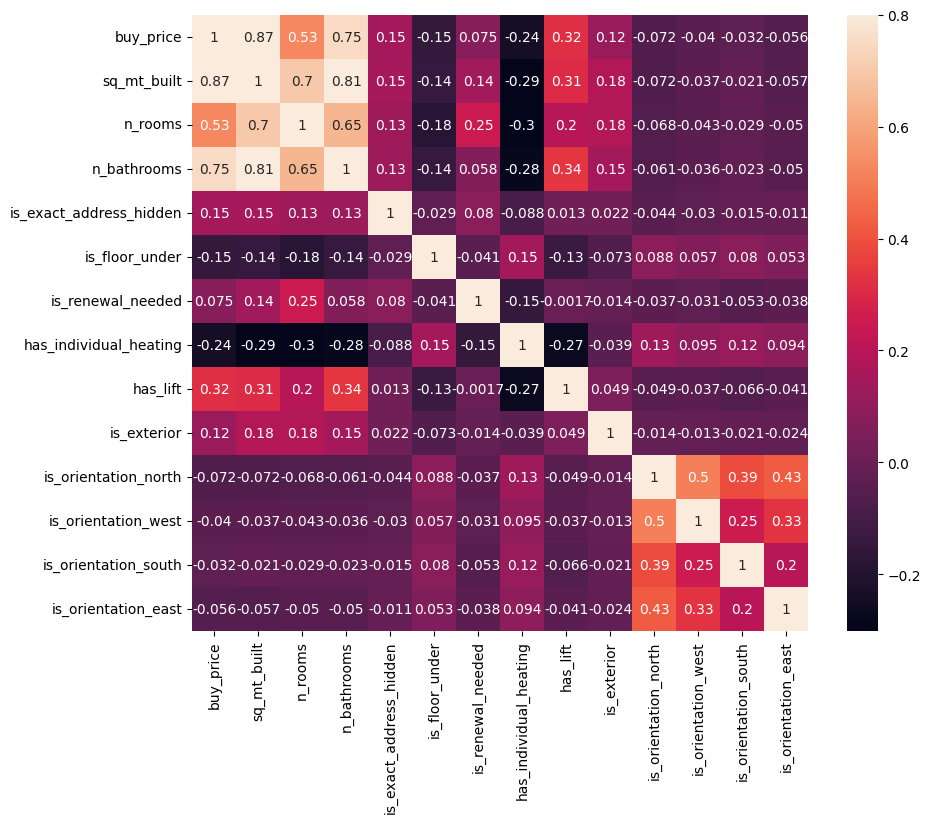

In [33]:

corrmat = tabla_matrix.corr()

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True, annot = True);

### Breve EDA

In [34]:
tabla_EDA=pd.concat([X_train,y_train], axis=1)

<AxesSubplot:xlabel='buy_price', ylabel='Density'>

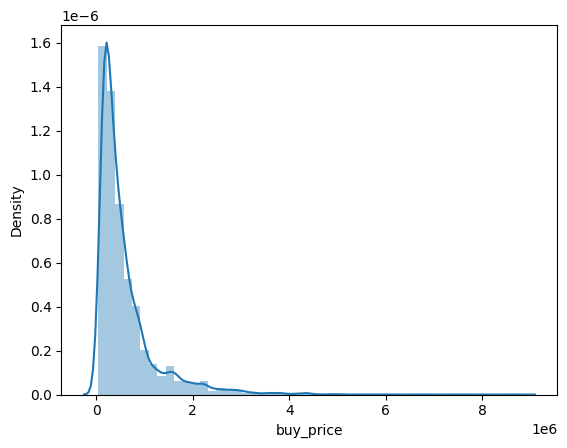

In [35]:
sns.distplot(tabla_EDA['buy_price'])

<AxesSubplot:xlabel='sq_mt_built', ylabel='Density'>

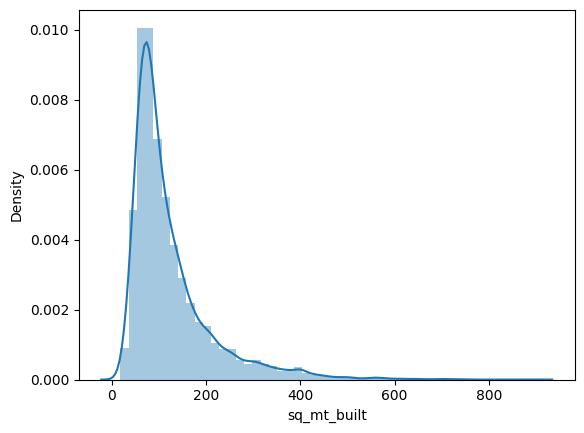

In [36]:
sns.distplot(tabla_EDA['sq_mt_built'])

### Volvemos a Datos en str para Get_dummies(get_dummies no convierte los bool)

In [37]:
X_train[['is_exact_address_hidden','floor', 'is_floor_under', 'neighborhood_id',
       'house_type_id', 'is_renewal_needed','has_individual_heating', 'has_lift','is_exterior', 'energy_certificate', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east']]= X_train[['is_exact_address_hidden','floor', 'is_floor_under', 'neighborhood_id',
       'house_type_id', 'is_renewal_needed','has_individual_heating', 'has_lift','is_exterior', 'energy_certificate', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east']].astype(str)



In [38]:
X_test[['is_exact_address_hidden','floor', 'is_floor_under', 'neighborhood_id',
       'house_type_id', 'is_renewal_needed','has_individual_heating', 'has_lift','is_exterior', 'energy_certificate', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east']]= X_test[['is_exact_address_hidden','floor', 'is_floor_under', 'neighborhood_id',
       'house_type_id', 'is_renewal_needed','has_individual_heating', 'has_lift','is_exterior', 'energy_certificate', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east']].astype(str)

### Eliminamos Outlayers

In [39]:

houses_train=X_train.join(y_train)

houses_train.columns

Index(['sq_mt_built', 'n_rooms', 'n_bathrooms', 'is_exact_address_hidden',
       'floor', 'is_floor_under', 'neighborhood_id', 'house_type_id',
       'is_renewal_needed', 'has_individual_heating', 'has_lift',
       'is_exterior', 'energy_certificate', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east',
       'buy_price'],
      dtype='object')

In [40]:
#Quitamos outlayers

houses_train= houses_train.loc[houses_train.sq_mt_built<=200]
houses_train= houses_train.loc[houses_train.buy_price<=1000000]


In [41]:
y_train= houses_train['buy_price']
X_train= houses_train[['sq_mt_built', 'n_rooms', 'n_bathrooms', 'is_exact_address_hidden',
       'floor', 'is_floor_under', 'neighborhood_id',
       'house_type_id', 'is_renewal_needed', 'has_individual_heating', 'has_lift',
       'is_exterior', 'energy_certificate', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east']]



In [42]:
houses_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10102 entries, 21467 to 12925
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sq_mt_built              10102 non-null  float64
 1   n_rooms                  10102 non-null  int64  
 2   n_bathrooms              10102 non-null  float64
 3   is_exact_address_hidden  10102 non-null  object 
 4   floor                    10102 non-null  object 
 5   is_floor_under           10102 non-null  object 
 6   neighborhood_id          10102 non-null  object 
 7   house_type_id            10102 non-null  object 
 8   is_renewal_needed        10102 non-null  object 
 9   has_individual_heating   10102 non-null  object 
 10  has_lift                 10102 non-null  object 
 11  is_exterior              10102 non-null  object 
 12  energy_certificate       10102 non-null  object 
 13  is_orientation_north     10102 non-null  object 
 14  is_orientation_wes

<AxesSubplot:xlabel='buy_price', ylabel='Density'>

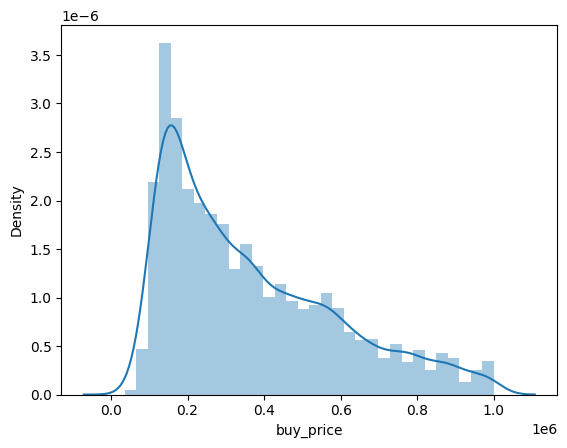

In [43]:
sns.distplot(y_train)

p-value Shapiro test Original:  0.0 skew 0.8931297425143504
p-value Shapiro test Logaritmic:  7.396290114146855e-39 skew -0.013042588967459119
p-value Shapiro test Box-cox:  7.046481175900523e-39 skew -0.0023625692787051134


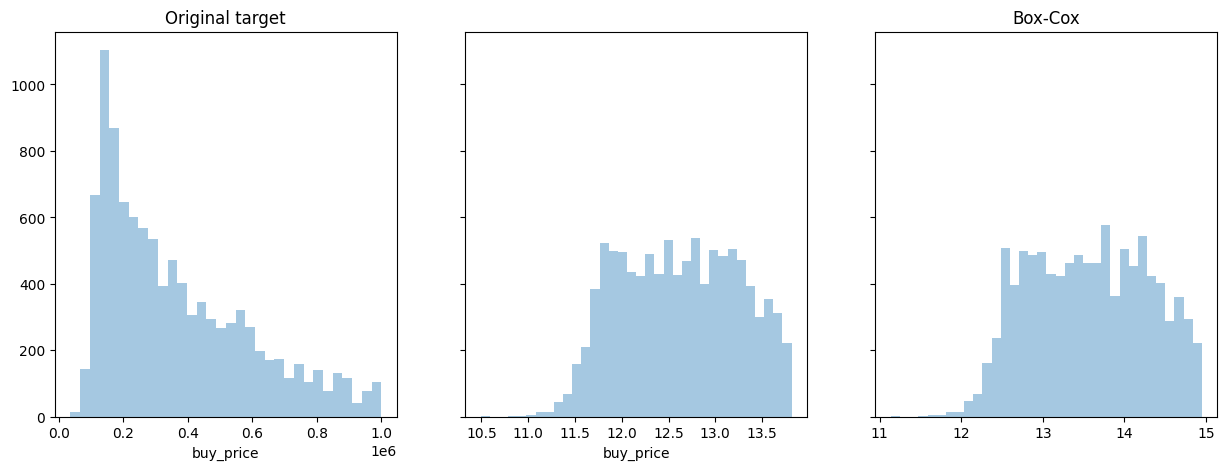

In [44]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Original target
print("p-value Shapiro test Original: ", shapiro(y_train).pvalue,'skew',skew(y_train))
sns.distplot(y_train, kde=False, ax=axes[0])
axes[0].set_title("Original target")

# Logaritmic
print("p-value Shapiro test Logaritmic: ", shapiro(np.log(y_train)).pvalue,'skew',skew(np.log(y_train)))
sns.distplot(np.log(y_train),kde=False, ax=axes[1])
#axes[1].set_title("Log" + '\np-value Shapiro ' + str(shapiro_test))

# Box-cox
print("p-value Shapiro test Box-cox: ", shapiro(stats.boxcox(y_train)[0]).pvalue,'skew',skew(stats.boxcox(y_train)[0]))
sns.distplot(stats.boxcox(y_train)[0],kde=False, ax=axes[2])
axes[2].set_title("Box-Cox");

## Grid Search

In [45]:
X_test.shape

(3026, 17)

In [46]:
X_train.shape

(10102, 17)

In [47]:
matrix_dummies=pd.concat([X_train,X_test])

In [48]:
matrix_dummies.shape


(13128, 17)

In [49]:
#Utilizamos Get_dummies en lugar de One-Hot-Encoder para evitar tener una columna que sea combinacion lineal del resto (drop_first)

matrix_dummies=pd.get_dummies(matrix_dummies, drop_first=True)


In [50]:
X_train= matrix_dummies.iloc[:10102]

In [51]:
X_test= matrix_dummies.iloc[10102:13128]

In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10102 entries, 21467 to 12925
Columns: 131 entries, sq_mt_built to is_orientation_east_True
dtypes: float64(2), int64(1), uint8(128)
memory usage: 1.5 MB


In [53]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3026 entries, 6530 to 6278
Columns: 131 entries, sq_mt_built to is_orientation_east_True
dtypes: float64(2), int64(1), uint8(128)
memory usage: 472.8 KB


### SelectKBest

-En vista de los resultados tras calcular la importancia de las variables(en funcion de f_regression), veo que existen 5 variables cuya importancia es bastante más elevada que la del resto. Pudiendo añadir una sexta tambien, si la casa es un sótano o no, que como vemos tiene una influencia fuerte en el precio.

-Una vez superadas estas variables, ya empiezan las variables de pertenencia a distintos distritos obteniendo unos mucha más puntuación que otros. Esto nos permite realizar la predicción sin tener en cuenta el barrio al que pertenece la casa. 

-De igual modo vemos que existen barrios con una influencia mucho mayor que otros(esto puede ser tambien porque esos barrios tienen menos muestras, al haber seleccionado muchos distritos). Resultaría interesante clasificar las viviendas por barrios más pequeños y ver como varían la influencia de estos barrios respecto la influencia de las 6 principales características.

-También para estudiar si queremos invertir en un barrio u otro, resulta interesante calcular como influyen varía la influencia de estas cinco variables, en unos barrios respecto a otros.


In [54]:
names= X_train.columns
sel = SelectKBest(f_regression, k=20)
X_new = sel.fit(X_train, y_train)

tabla_importancia= pd.DataFrame({'column': names, 'score': sel.scores_}).sort_values('score', ascending=False)
tabla_importancia[:6]

,column,score
0,sq_mt_built,14046.859235
2,n_bathrooms,8069.871540
116,has_lift_True,3027.844602
1,n_rooms,1665.077333
115,has_individual_heating_True,1150.287463
21,is_floor_under_True,364.429724


In [94]:
tabla_importancia.to_csv('tabla_importancia.csv')

### Decision Tree

-No necesito escalar

-Reduzco las columnas(131), para evitar Overfitting:
    
-PCA, quizas mal si no quito bien Outlayers( paso error de 71mil a 84mil)(mean_absolute_error)
    

In [56]:

tree = Pipeline(steps = [
    ("pca", PCA()),
    ("decissiontree", DecisionTreeRegressor())])


tree_param = {}


gs_tree= GridSearchCV(tree,
tree_param,
cv=5,
scoring = 'neg_mean_absolute_error',
n_jobs = -1,
verbose = 1)



In [57]:
%%time 
gs_tree.fit(X_train, y_train)

print("Best estimator:", gs_tree.best_estimator_)
print("Best params:", gs_tree.best_params_)
print("Best score:", gs_tree.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best estimator: Pipeline(steps=[('pca', PCA()), ('decissiontree', DecisionTreeRegressor())])
Best params: {}
Best score: -83854.09809780426
Wall time: 3.86 s


### Random Forest

-Nos interesa, por que evita que el modelo caiga en Overfitting. No necesito reducción de dimensionalidad y tampoco un CV alto.

-No necesito escalar

Resultados:

    -Según aumento n_estimators y max_features aumento la precisión del modelo, estabilizandose entorno 55-60 mil, de hecho para reducir tiempo de cálculo podría reducir N_estimator= 1000, y max_features=10.


In [58]:

rand_forest = Pipeline(steps = [
    ("randomforest", RandomForestRegressor())])



rand_forest_param = {
    'randomforest__n_estimators': [10000],
    'randomforest__max_features': [5,10]
}



gs_rand_forest = GridSearchCV(rand_forest,
rand_forest_param,
cv=5,
scoring = 'neg_mean_absolute_error',
n_jobs = -1,
verbose = 1)


In [59]:
%%time 
gs_rand_forest.fit(X_train, y_train)

print("Best estimator:", gs_rand_forest.best_estimator_)
print("Best params:", gs_rand_forest.best_params_)
print("Best score:", gs_rand_forest.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best estimator: Pipeline(steps=[('randomforest',
                 RandomForestRegressor(max_features=10, n_estimators=10000))])
Best params: {'randomforest__max_features': 10, 'randomforest__n_estimators': 10000}
Best score: -56500.16822152991
Wall time: 8min 16s


In [60]:
print(gs_rand_forest.cv_results_)

{'mean_fit_time': array([231.12100196, 272.73227215]), 'std_fit_time': array([1.97089087, 2.91533815]), 'mean_score_time': array([100.91187706,  74.15601578]), 'std_score_time': array([3.60621213, 2.06910744]), 'param_randomforest__max_features': masked_array(data=[5, 10],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_randomforest__n_estimators': masked_array(data=[10000, 10000],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'randomforest__max_features': 5, 'randomforest__n_estimators': 10000}, {'randomforest__max_features': 10, 'randomforest__n_estimators': 10000}], 'split0_test_score': array([-57992.03351838, -56074.60179848]), 'split1_test_score': array([-58987.66459343, -57512.60237137]), 'split2_test_score': array([-57812.3476206 , -55583.25890264]), 'split3_test_score': array([-58545.41188419, -56708.9837665 ]), 'split4_test_score': array([-58717.2331884 , -56621.39426866]), 'mean_test_

### XGBoost

Resultados:

    -Obtiene la mejor puntuación para la validación, sin los outlayers.
    

In [61]:

XG_boost = Pipeline(steps = [
    ("XG_boost", xgb.XGBRegressor())])



XG_boost_param = {
    'XG_boost__learning_rate': [0.05,0.1],
    'XG_boost__n_estimators': [1000]
}



gs_XG_boost= GridSearchCV(XG_boost,
XG_boost_param,
cv=5,
scoring = 'neg_mean_absolute_error',
n_jobs = -1,
verbose = 1)



In [62]:
%%time 
gs_XG_boost.fit(X_train, y_train)

print("Best estimator:", gs_XG_boost.best_estimator_)
print("Best params:", gs_XG_boost.best_params_)
print("Best score:", gs_XG_boost.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best estimator: Pipeline(steps=[('XG_boost',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.1, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
  

### Regresion Lineal


-Necesito tener variables que no tengan alta colinealidad entre ellas, por eso malos resultados. Quizas eliminar n_rooms o n_bathrooms 

-Con tantas columnas, además necesitare hacer despues una regularizacion(Ridge/Elastic Net)

    Resultados:

    -Solo quitando la columna colineal de get_dummies se reduce una barbaridad el error.
        
    -Seleccionando cierto CV( en este caso 3), se dispara negativamente la puntuación porque en un croos-validation la puntacion es muy mala( significa que tengo muchos outlayers??)



In [63]:

reg_lineal = Pipeline(steps = [
    ("scaler", StandardScaler()),
    ("reg_lin", LinearRegression())])


reg_lineal_param = {}


gs_reg_lin= GridSearchCV(reg_lineal,
reg_lineal_param,
cv=5,
scoring = 'neg_mean_absolute_error',
n_jobs = -1,
verbose = 1)



In [64]:
%%time 
gs_reg_lin.fit(X_train, y_train)

print("Best estimator:", gs_reg_lin.best_estimator_)
print("Best params:", gs_reg_lin.best_params_)
print("Best score:", gs_reg_lin.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best estimator: Pipeline(steps=[('scaler', StandardScaler()), ('reg_lin', LinearRegression())])
Best params: {}
Best score: -57940.04726197921
Wall time: 1.78 s


In [65]:
print( gs_reg_lin.cv_results_)

{'mean_fit_time': array([0.12941613]), 'std_fit_time': array([0.00639545]), 'mean_score_time': array([0.00160122]), 'std_score_time': array([0.00320244]), 'params': [{}], 'split0_test_score': array([-58036.20630151]), 'split1_test_score': array([-58941.04009892]), 'split2_test_score': array([-57109.6613531]), 'split3_test_score': array([-57535.70736417]), 'split4_test_score': array([-58077.6211922]), 'mean_test_score': array([-57940.04726198]), 'std_test_score': array([613.70861447]), 'rank_test_score': array([1])}


### Regresion Lineal (seleccionando variables SelectKBest)

-Necesito tener variables que no tengan alta colinealidad entre ellas. Voy a probar a reducir variables con SelectKBest.


Resultados:

    -Obtengo que reducciendo las Variables no mejoro el resultado, lo cual es logico debido al aumento de error por pérdida de variables. Sin embargo quería comprobar cúal era la diferencia debido a la gran influencia lineal de precio con los metros cuadrados y la colinealidad existente entre estos metros cuadrados y otras variables como el número de baños y de habitaciones.En concreto el mean absolute error se queda entorno a los 100 mil euros para las tres opciones de K probadas(1,3,5). 
    
    -Habría que buscar variables no colineales, con alta ifluencia(sq_mt_built,has_lift,has individual heating, is_floor under,is_exterior y latitud y longitud)

    



In [66]:

reg_linealconK = Pipeline(steps = [
    ("scaler", StandardScaler()),
    ("selectkbest",SelectKBest()),
    ("reg_lin", LinearRegression())])


reg_linealconK_param = {"selectkbest__k": [1,3,5]}


gs_reg_linealconK= GridSearchCV(reg_linealconK,
reg_linealconK_param,
cv=5,
scoring = 'neg_mean_absolute_error',
n_jobs = -1,
verbose = 1)



In [67]:
%%time 
gs_reg_linealconK.fit(X_train, y_train)

print("Best estimator:", gs_reg_linealconK.best_estimator_)
print("Best params:", gs_reg_linealconK.best_params_)
print("Best score:", gs_reg_linealconK.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best estimator: Pipeline(steps=[('scaler', StandardScaler()), ('selectkbest', SelectKBest(k=5)),
                ('reg_lin', LinearRegression())])
Best params: {'selectkbest__k': 5}
Best score: -101226.89748922476
Wall time: 1.3 s


### ElasticNet

-Dado que sospecho que unas features funcionan mucho mejor que otras(sq_mt_built y n_bathrooms), usare Lasso o Elasticnet, para regularizar la regresion lineal. En concreto dado el alto número de features probaré con ElasticNet.

Resultados:

    -No mejora la regresion lineal, la empeora y solo con alpha=0.05 la iguala.

In [68]:

elastic_net = Pipeline(steps = [
    ("scaler", StandardScaler()),
    ("elastic_net", ElasticNet())])


elastic_net_param = {"elastic_net__alpha": [0.01,0.05,0.1,10]}


gs_elastic_net= GridSearchCV(elastic_net,
elastic_net_param,
cv=5,
scoring = 'neg_mean_absolute_error',
n_jobs = -1,
verbose = 1)



In [69]:
%%time 
gs_elastic_net.fit(X_train, y_train)

print("Best estimator:", gs_elastic_net.best_estimator_)
print("Best params:", gs_elastic_net.best_params_)
print("Best score:", gs_elastic_net.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('elastic_net', ElasticNet(alpha=0.05))])
Best params: {'elastic_net__alpha': 0.05}
Best score: -57919.315236604816
Wall time: 7.25 s


### Ridge

-Me va a permitir evitar 

Resultados:

    -Modifico alpha y el resultado es practicamente el mismo.

In [70]:

lineal_ridge = Pipeline(steps = [
    ("scaler", StandardScaler()),
    ("ridge", Ridge())])


lineal_ridge_param = {"ridge__alpha": [0.0005,0.005,0.05,0.1,60]}


gs_lineal_ridge= GridSearchCV(lineal_ridge,
lineal_ridge_param,
cv=5,
scoring = 'neg_mean_absolute_error',
n_jobs = -1,
verbose = 1)



In [71]:
%%time 
gs_lineal_ridge.fit(X_train, y_train)

print("Best estimator:", gs_lineal_ridge.best_estimator_)
print("Best params:", gs_lineal_ridge.best_params_)
print("Best score:", gs_lineal_ridge.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best estimator: Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge(alpha=60))])
Best params: {'ridge__alpha': 60}
Best score: -57929.34738824214
Wall time: 569 ms


### SVR

-Robusto frente a outliers.

-Robusto frente a Overfitting.

Resultados:

    -Mismas puntuaciones con SelectKbest y sin él, luego lo dejo para que generalize mejor.

In [89]:

svr = Pipeline([
    ("scaler", StandardScaler()),
    ("selectkbest",SelectKBest()),
    ("svr", svm.SVR())])

svr_param = {'selectkbest__k': [1,3,5],
    "svr__C": [1,0.1],
    "svr__kernel": ['linear', 'poly', 'rbf']
}

gs_svr= GridSearchCV(svr,
svr_param,
cv=5,
scoring = 'neg_mean_absolute_error',
n_jobs = -1,
verbose = 1)

In [90]:
%%time 
gs_svr.fit(X_train, y_train)

print("Best estimator:", gs_svr.best_estimator_)
print("Best params:", gs_svr.best_params_)
print("Best score:", gs_svr.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best estimator: Pipeline(steps=[('scaler', StandardScaler()), ('selectkbest', SelectKBest(k=1)),
                ('svr', SVR(C=1, kernel='poly'))])
Best params: {'selectkbest__k': 1, 'svr__C': 1, 'svr__kernel': 'poly'}
Best score: -164898.2550829984
Wall time: 30.2 s


### Comparación de todos los modelos

In [91]:
grids = {
    "gs_tree": gs_tree,
    "gs_rand_forest": gs_rand_forest,
    "gs_XG_boost": gs_XG_boost,
    "gs_reg_lin": gs_reg_lin,
    "gs_reg_linealconK": gs_reg_linealconK,
    "gs_elastic_net": gs_elastic_net,
    "gs_lineal_ridge": gs_lineal_ridge,
    "gs_svr": gs_svr
}


In [92]:
best_grids = [(i, j.best_score_) for i, j in grids.items()]

best_grids = pd.DataFrame(best_grids, columns = ["Grid", "Best score"])
best_grids.sort_values(by = "Best score", ascending = False)

,Grid,Best score
2,gs_XG_boost,-47265.641847
1,gs_rand_forest,-56500.168222
5,gs_elastic_net,-57919.315237
6,gs_lineal_ridge,-57929.347388
3,gs_reg_lin,-57940.047262
0,gs_tree,-83854.098098
4,gs_reg_linealconK,-101226.897489
7,gs_svr,-164898.255083


In [74]:
import pickle

with open('finishe_model.model', "wb") as archivo_salida:
    pickle.dump(gs_XG_boost.best_estimator_, archivo_salida)

In [75]:
with open('finishe_model.model', "rb") as archivo_entrada:
    pipeline_importada = pickle.load(archivo_entrada)
    
print(pipeline_importada)

Pipeline(steps=[('XG_boost',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.1, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])


In [95]:
#Esto una vez tenga el mejor modelo

print("Best estimator:", gs_XG_boost.best_estimator_)
print("Best params:", gs_XG_boost.best_params_)
print("Best score:", gs_XG_boost.best_score_)

Best estimator: Pipeline(steps=[('XG_boost',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.1, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])
Best param

In [98]:
#Aqui ya hago predicciones con mejor modelo
predicciones= gs_reg_lin.predict(X_test)
mean_absolute_error(predicciones,y_test)


132795.93907676265

# Conclusiones

-Creo que el haber hecho el train_test_split previamente y a la vez disponer de tantos distritos(algunos con pocas casas), me perjudica de cara a las predicciones, pues habre dejado columnas en train sin apenas valores. el modelo sin embargo puede ser útil para predecir el precio agrupando por barrios más selectivos, en función del interés del estudio.

-El haber dejado fuera del X_test los outlayers de las casas de mayor metros cuadrados y precio, perjudica enormemente la precisión del modelo como he podido comprobar, debido a la gran diferencia de la influencia de las carácteristicas de la vivienda sobre el precio de la misma, entre casas con precios muy elevados y el resto de las casas. Sin embargo, este modelo me es mucho más útil para el objetivo de estudio inicial, que era encontrar casas ( de un precio no tan elevado) que representasen una buena inversión debido a que su precio de venta estaba por debajo del precio de mercado esperado en función de sus características.

